In [ ]:
# Download dataset on kaggle website.
import kagglehub
zusmani_pakistans_largest_ecommerce_dataset_path = kagglehub.dataset_download('zusmani/pakistans-largest-ecommerce-dataset')

print('Data source import complete.')


Data source import complete.


# Phân Tích Dữ Liệu Thương Mại Điện Tử ở Pakistan

### Giới thiệu chung:
Bộ dữ liệu chứa thông tin chi tiết của nửa triệu đơn hàng thương mại điện tử tại Pakistan từ tháng 3 năm 2016 đến tháng 8 năm 2018. Nó bao gồm thông tin chi tiết về mặt hàng, phương thức vận chuyển, phương thức thanh toán như thẻ tín dụng, Easy-Paisa, Jazz-Cash, thanh toán khi nhận hàng (cash-on-delivery), các danh mục sản phẩm như thời trang, điện thoại di động, điện tử, thiết bị gia dụng, v.v., ngày đặt hàng, SKU, giá, số lượng, tổng cộng và ID khách hàng. Đây là bộ dữ liệu chi tiết nhất về thương mại điện tử tại Pakistan mà bạn có thể tìm thấy trong phạm vi công cộng (Public domain).
https://www.kaggle.com/datasets/zusmani/pakistans-largest-ecommerce-dataset/data

## 1. Các thư viện sử dụng

In [ ]:
# Thư viện xử lý dữ liệu
import pandas as pd
import numpy as np
from scipy import stats

# Thư viện trực quan hóa dữ liệu
import matplotlib.pyplot as plt
import seaborn as sns

# Đảm bảo rằng biểu đồ sẽ hiển thị trực tiếp trong Jupyter Notebook
%matplotlib inline

# Tắt các cảnh báo không quan trọng để tránh làm rối kết quả hiển thị
import warnings
warnings.simplefilter('ignore')

# In thông báo khi đã nhập thư viện thành công
print('Successfully Import Libraries')


Successfully Import Libraries


## 2. Khám phá dữ liệu

### 2.1 Nhập dữ liệu

In [ ]:
'''
df=pd.read_csv('C:/Phan_tich_du_lieu/Cuoiki/dataset.csv')
print('Successfully Import Libraries')'''

"\ndf=pd.read_csv('C:/Phan_tich_du_lieu/Cuoiki/dataset.csv')\nprint('Successfully Import Libraries')"

In [ ]:
df = pd.read_csv("/kaggle/input/pakistans-largest-ecommerce-dataset/Pakistan Largest Ecommerce Dataset.csv")

print('Successfully Load Data')

Successfully Load Data


### 2.3 Hiển thị dữ liệu sơ bộ ban đầu

In [ ]:
# Hiển thị tất cả các cột
pd.set_option('display.max_columns', None)

# Hiển thị vài dòng đầu tiên
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(f'Number of rows : {df.shape[0]}')
print(f'Number of columns : {df.shape[1]}')

Number of rows : 1048575
Number of columns : 26


In [ ]:
# Tên các cột
df.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
# Kiểm tra kiểu dữ liệu
df.dtypes

,0
item_id,float64
status,object
created_at,object
sku,object
price,float64
qty_ordered,float64
grand_total,float64
increment_id,object
category_name_1,object
sales_commission_code,object


In [ ]:
# Thông tin về dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447346 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

In [ ]:
# Hiển thị số thực (float) mà không dùng ký hiệu khoa học
pd.set_option('display.float_format', '{:.0f}'.format)

# Hiển thị thống kê mô tả của các cột số trong DataFrame
df.describe()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,584524,584524,584524,584524,584524,584524,584524,584513,0,0,0,0,0
mean,565667,6349,1,8531,499,2017,7,45791,NaN,NaN,NaN,NaN,NaN
std,200121,14949,4,61321,1507,1,3,34415,NaN,NaN,NaN,NaN,NaN
min,211131,0,1,-1594,-600,2016,1,1,NaN,NaN,NaN,NaN,NaN
25%,395001,360,1,945,0,2017,4,13516,NaN,NaN,NaN,NaN,NaN
50%,568424,899,1,1960,0,2017,7,42856,NaN,NaN,NaN,NaN,NaN
75%,739106,4070,1,6999,160,2018,11,73536,NaN,NaN,NaN,NaN,NaN
max,905208,1012626,1000,17888000,90300,2018,12,115326,NaN,NaN,NaN,NaN,NaN


## 3. Tiền xử lí dữ liệu

### 3.1 Kiểm tra các giá trị còn thiếu

In [ ]:
# Tạo bản sao của DataFrame
df_missing = df.copy()

# Tính giá trị bị thiếu và tỉ lệ phần trăm của chúng
missing_data = df_missing.isnull().sum().sort_values(ascending=False).reset_index()
missing_data.columns = ['Columns Name', 'Missing Values']
missing_data['Percentage Missing Values'] = (missing_data['Missing Values'] / len(df_missing)) * 100
missing_data['Percentage Missing Values'] = missing_data['Percentage Missing Values'].apply(lambda x: f"{x:.0f}%")
missing_data


,Columns Name,Missing Values,Percentage Missing Values
0,Unnamed: 23,1048575,100%
1,Unnamed: 22,1048575,100%
2,Unnamed: 25,1048575,100%
3,Unnamed: 24,1048575,100%
4,Unnamed: 21,1048575,100%
5,sales_commission_code,601229,57%
6,category_name_1,464215,44%
7,sku,464071,44%
8,status,464066,44%
9,Customer Since,464062,44%


### 3.2 Trực quan hóa các giá trị bị thiếu

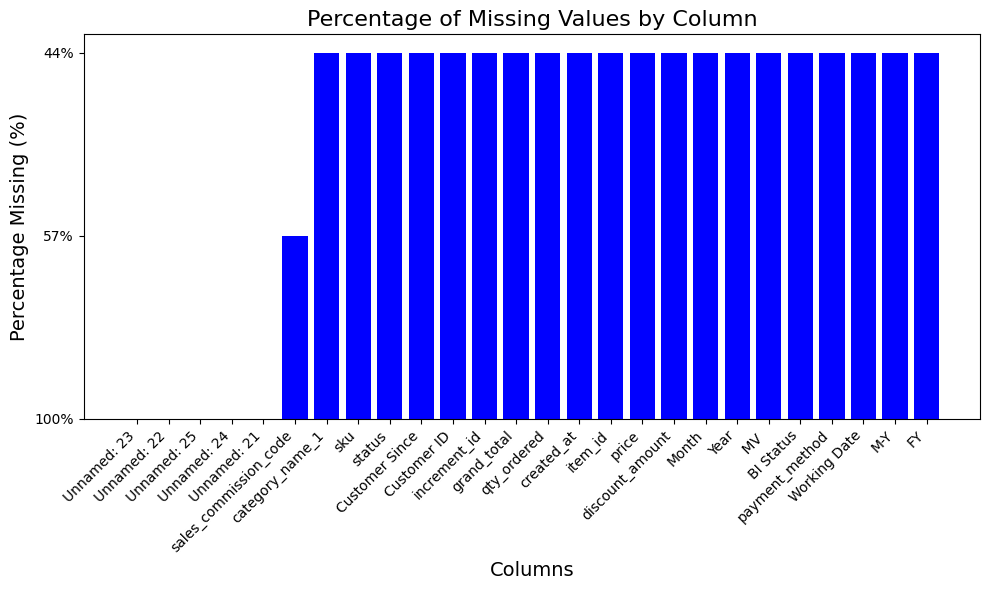

In [ ]:
# Lọc các cột có giá trị bị thiếu > 0 để trực quan hóa
missing_data_filtered = missing_data[missing_data['Missing Values'] > 0]

# Trực quan hóa
plt.figure(figsize=(10, 6))
plt.bar(missing_data_filtered['Columns Name'], missing_data_filtered['Percentage Missing Values'], color='blue')
plt.title('Percentage of Missing Values by Column', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Percentage Missing (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 3.3 Xử lí giá trị trùng lặp

In [ ]:
# Kiểm tra xem có hàng bị trùng lặp không
duplicates = df.duplicated()

# Đếm tổng số hàng bị trùng lặp
total_duplicates = df.duplicated().sum()

print(f"Total number of duplicate rows in the data: {total_duplicates}")


Total number of duplicate rows in the data: 464050


In [ ]:
# DataFrame chứa các giá trị duy nhất từ các cột khác nhau
unique_status = pd.DataFrame({'unique_status': df['status'].unique()})
unique_payment_method = pd.DataFrame({'unique_payment_method': df['payment_method'].unique()})
unique_category_name_1 = pd.DataFrame({'unique_category_name_1': df['category_name_1'].unique()})
unique_bi_status = pd.DataFrame({'unique_BI_Status': df['BI Status'].unique()})

# Nối các DataFrame lại với nhau theo chiều ngang và thay NaN bằng chuỗi rỗng
merged_df = pd.concat([unique_status, unique_payment_method, unique_category_name_1, unique_bi_status], axis=1).fillna('')

# Hiển thị kết quả
merged_df


,unique_status,unique_payment_method,unique_category_name_1,unique_BI_Status
0,complete,cod,Women's Fashion,#REF!
1,canceled,ublcreditcard,Beauty & Grooming,Gross
2,order_refunded,mygateway,Soghaat,Net
3,received,customercredit,Mobiles & Tablets,Valid
4,refund,cashatdoorstep,Appliances,
5,closed,mcblite,Home & Living,
6,fraud,internetbanking,Men's Fashion,
7,holded,marketingexpense,Kids & Baby,
8,exchange,productcredit,\N,
9,pending_paypal,financesettlement,Others,


### 3.4 Làm sạch dữ liệu

#### 3.4.1 Loại bỏ các cột không cần thiết

In [ ]:
print('Shape Before Drop Columns')
df.shape

Shape Before Drop Columns


(1048575, 26)

In [ ]:
# Xóa các cột không cần thiết
df.drop(['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1, inplace=True)
print("Unnecessary columns ('Unnamed: 21, to 'Unnamed: 25') have been successfully dropped from the dataset")

Unnecessary columns ('Unnamed: 21, to 'Unnamed: 25') have been successfully dropped from the dataset


In [ ]:
# Xóa cột 'sales_commission_code' vì có hơn 50% giá trị bị thiếu, không phù hợp để điền dữ liệu do tính duy nhất của nó
df.drop('sales_commission_code', axis=1, inplace=True)
# Loại bỏ cột 'M-Y' khỏi bộ dữ liệu vì thông tin của nó đã được thể hiện trong hai cột riêng biệt 'Year' và 'Month'
df.drop('M-Y', axis=1, inplace=True)

print("Successfully dropped 'M-Y' & 'sales_commission_code' columns from the dataset")

Successfully dropped 'M-Y' & 'sales_commission_code' columns from the dataset


In [ ]:
print('Shape After Drop Columns')
df.shape

Shape After Drop Columns


(1048575, 19)

#### 3.4.2 Xử lí các giá trị bị thiếu

In [ ]:
print('Shape Before Handling Missing Values')
df.shape

Shape Before Handling Missing Values


(1048575, 19)

In [ ]:
# Kiểm tra giá trị bị thiếu
percentage_missing = (df.isnull().sum() / len(df)) * 100
percentage_missing = percentage_missing.map("{:.0f}%".format)
percentage_missing

,0
item_id,44%
status,44%
created_at,44%
sku,44%
price,44%
qty_ordered,44%
grand_total,44%
increment_id,44%
category_name_1,44%
discount_amount,44%


In [ ]:
# Dữ liệu có rất nhiều hàng chứa toàn bộ giá trị là NaN nên cần phải loại bỏ
df.tail(8)


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,FY,Customer ID
1048567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Xóa những hàng mà tất cả các giá trị đều là NaN
df.dropna(how='all', inplace=True)
print("Rows with all values NaN have been successfully dropped from the dataset")


Rows with all values NaN have been successfully dropped from the dataset


In [ ]:
# Kkiểm tra lại các giá trị bị thiếu
df.isnull().sum()


,0
item_id,0
status,15
created_at,0
sku,20
price,0
qty_ordered,0
grand_total,0
increment_id,0
category_name_1,164
discount_amount,0


In [ ]:
# Điền giá trị bị thiếu trong các cột 'status', 'category_name_1', và 'Customer Since' bằng giá trị mode của từng cột
# vì các cột này chứa dữ liệu phân loại (categorical)
df['status'].fillna(df['status'].mode()[0], inplace=True)
df['category_name_1'].fillna(df['category_name_1'].mode()[0], inplace=True)
df['Customer Since'].fillna(df['Customer Since'].mode()[0], inplace=True)

# Xóa các hàng có giá trị bị thiếu ở cột 'sku' hoặc 'Customer ID'
# vì 'sku' và 'Customer ID' là duy nhất (unique)
df.dropna(subset=['sku', 'Customer ID'], inplace=True)

print("Missing values filled for 'status', 'category_name_1', and 'Customer Since'.")
print()
print("Rows with missing values in 'sku' or 'Customer ID' have been dropped.")

Missing values filled for 'status', 'category_name_1', and 'Customer Since'.

Rows with missing values in 'sku' or 'Customer ID' have been dropped.


In [ ]:
# Xử lý thành công các giá trị bị thiếu
df.isnull().sum()


,0
item_id,0
status,0
created_at,0
sku,0
price,0
qty_ordered,0
grand_total,0
increment_id,0
category_name_1,0
discount_amount,0


In [ ]:
print('Shape After Handling Missing Values')
df.shape

Shape After Handling Missing Values


(584493, 19)

#### 3.4.3 Loại bỏ sự không nhất quán của dữ liệu

In [ ]:
# Xóa 'FY' khỏi tên cột FY và thay bằng '20'
df['FY'] = df['FY'].str.replace('FY', '20', regex=True)

# Xóa dấu phẩy trong cột MV
df[' MV '] = df[' MV '].str.replace(',', '', regex=True)

# Xóa ký tự # và ! trong cột BI Status
df['BI Status'] = df['BI Status'].replace('#', '', regex=True).replace('!', '', regex=True)

print('remove inconsistency from column completed successfully')

remove inconsistency from column completed successfully


In [ ]:
# Đổi tên các cột thành tên có ý nghĩa hơn
df.rename(columns={
    ' MV ': 'market_value',
    'FY': 'fiscal_year',
    'Year': 'year',
    'Month': 'month',
    'sku': 'stock_keeping_unit',
    'Customer Since': 'customer_since',
    'Customer ID': 'customer_id',
    'category_name_1': 'category_name',
    'BI Status': 'bi_status',
    'Working Date': 'working_date'
}, inplace=True)

print("Rename columns successfully")

Rename columns successfully


In [ ]:
# Dữ liệu của chúng ta có chứa \N nên thay thế '\N' bằng NaN và điền các hàng chứa giá trị NaN
df.replace('\\N', pd.NA, inplace=True)  # Dữ liệu chứa \N, nhưng cần viết là \\N để tránh lỗi
df['category_name']= df['category_name'].fillna(df['category_name'].mode()[0]) # chỉ có hai cột chứa \N
df['status']= df['status'].fillna(df['status'].mode()[0])

print('Handle \\N Successfullyl')

Handle \N Successfullyl


### 3.5 Chuyển đổi kiểu dữ liệu

In [ ]:
# Kiểm tra kiểu dữ liệu của các cột
df.dtypes


,0
item_id,float64
status,object
created_at,object
stock_keeping_unit,object
price,float64
qty_ordered,float64
grand_total,float64
increment_id,object
category_name,object
discount_amount,float64


In [ ]:
# Chuyển đổi kiểu datetime và xử lý giá trị thiếu nếu xuất hiện (errors='coerce')

# Chuyển thành kiểu dữ liệu Datetime
df['working_date'] = pd.to_datetime(df['created_at'], errors='coerce')
df['created_at'] = pd.to_datetime(df['customer_since'], errors='coerce')
df['customer_since'] = pd.to_datetime(df['customer_since'], errors='coerce')

# Điền NaN nếu xuất hiện trong các cột datetime bằng giá trị mode tương ứng
date_columns = ['working_date', 'created_at', 'customer_since']  # Xác định các cột
for col in date_columns:
    mode_value = df[col].mode()[0]  # Lấy giá trị mode của cột
    df[col].fillna(mode_value, inplace=True)

print("Datetime conversion and missing values handling completed successfully")

Datetime conversion and missing values handling completed successfully


In [ ]:
# Chuyển đổi kiểu dữ liệu phân loại (Categorical)

# Chuyển các cột được chỉ định sang kiểu dữ liệu category
categorical_columns = ['status', 'payment_method', 'category_name', 'bi_status', 'stock_keeping_unit']
df[categorical_columns] = df[categorical_columns].astype('category')

print("category type conversion process completed successfully")


category type conversion process completed successfully


In [ ]:
# Chuyển đổi kiểu số và xử lý giá trị thiếu nếu xuất hiện (errors='coerce')

# Chuyển 'increment_id' sang kiểu số và ép các giá trị không hợp lệ thành NaN
# (Các giá trị không hợp lệ như chuỗi sẽ bị thay bằng NaN nhờ errors='coerce')
df['increment_id'] = pd.to_numeric(df['increment_id'], errors='coerce')

# Xóa các hàng mà 'increment_id' là NaN
df.dropna(subset=['increment_id'], inplace=True)
# Chuyển cột sang kiểu số nguyên sau khi đã xóa NaN
df['increment_id'] = df['increment_id'].astype(int)

# Chuyển cột price sang kiểu int
df['price']= pd.to_numeric(df['price'], errors='coerce')
df['price']= df['price'].fillna(df['price'].mean()).astype(int)

# Chuyển cột qty_ordered sang kiểu int
df['qty_ordered'] = pd.to_numeric(df['qty_ordered'], errors='coerce')
df['qty_ordered']= df['qty_ordered'].fillna(df['qty_ordered'].median()).astype(int)

# Chuyển cột customer_id sang kiểu int
df['customer_id'] = pd.to_numeric(df['customer_id'], errors='coerce')
df.dropna(subset=['customer_id'], inplace=True)
df['customer_id'] = df['customer_id'].astype(int)

# Chuyển cột grand_total sang kiểu int
df['grand_total']= pd.to_numeric(df['grand_total'], errors='coerce')
df['grand_total']= df['grand_total'].fillna(df['grand_total'].median()).astype(int)

# Chuyển cột item_id sang kiểu int
df['item_id'] = pd.to_numeric(df['item_id'], errors='coerce')
df.dropna(subset=['item_id'], inplace=True)
df['item_id'] = df['item_id'].astype(int)

# Chuyển cột market_value sang kiểu int
df['market_value'] = pd.to_numeric(df['market_value'], errors='coerce')
df['market_value']= df['market_value'].fillna(df['market_value'].mean()).astype(int)

# Chuyển cột discount_amount sang kiểu int
df['discount_amount'] = pd.to_numeric(df['discount_amount'], errors='coerce')
df['discount_amount']= df['discount_amount'].fillna(df['discount_amount'].median()).astype(int)

# Chuyển cột year sang kiểu int
df['year']= df['year'].astype(int)

# Chuyển cột month sang kiểu int
df['month']= df['month'].astype(int)

# Chuyển cột fiscal_year sang kiểu int
df['fiscal_year']= df['fiscal_year'].astype(int)

print("int type conversion and handle missing values if appears process completed successfully")

int type conversion and handle missing values if appears process completed successfully


In [ ]:
# Kiểm tra dữ liệu sau chuyển đổi
df.dtypes

,0
item_id,int64
status,category
created_at,datetime64[ns]
stock_keeping_unit,category
price,int64
qty_ordered,int64
grand_total,int64
increment_id,int64
category_name,category
discount_amount,int64


### 3.6 Kiểm tra và xử lý các hàng bị trùng lặp


In [ ]:
# Kiểm tra xem có hàng bị trùng lặp không
duplicates = df.duplicated()

# Đếm tổng số hàng bị trùng lặp
total_duplicates = df.duplicated().sum()

print(f"Total number of duplicate rows in the data: {total_duplicates}")

Total number of duplicate rows in the data: 0


### 3.7 Xử lí giá trị ngoại lai (Outliers)

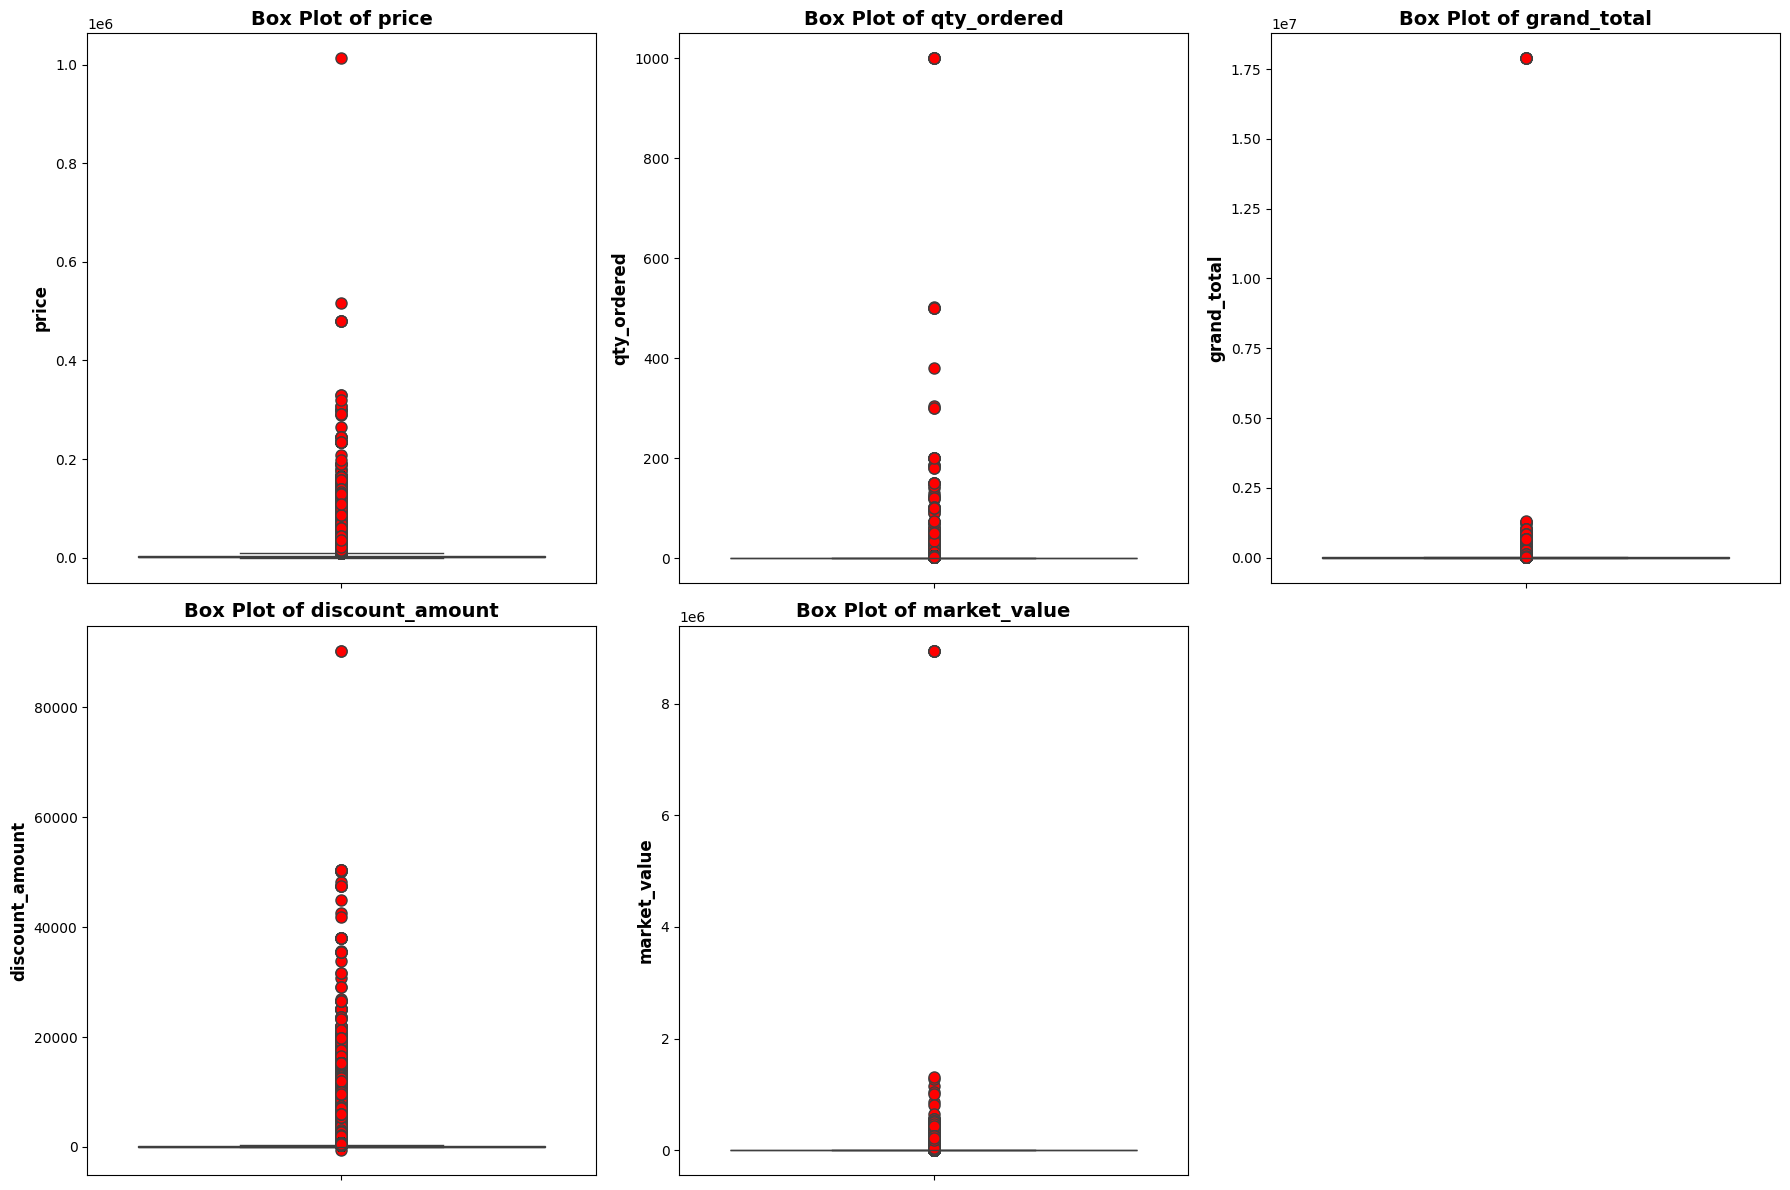

In [ ]:
# Đặt kích thước cho toàn bộ biểu đồ
plt.figure(figsize=(18, 12))

# Danh sách các cột sẽ vẽ biểu đồ
columns_to_plot = ['price', 'qty_ordered', 'grand_total', 'discount_amount', 'market_value']

# Lặp qua từng cột và tạo subplot
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # Tạo subplot với 2 hàng và 3 cột
    sns.boxplot(data=df, y=column, flierprops={'marker': 'o', 'markersize': 8, 'markerfacecolor': 'red'})  # Biểu đồ hộp
    plt.title(f'Box Plot of {column}', fontsize=14, fontweight='bold')
    plt.ylabel(column, fontsize=12, fontweight='bold')

# Điều chỉnh bố cục để tránh chồng lấn
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


#### 3.7.1 Tính số lượng outliers trong từng cột riêng biệt

In [ ]:
# Hàm tìm outliers sử dụng phương pháp IQR
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Hàm tìm outliers sử dụng phương pháp Z-score
def find_outliers_zscore(data, column):
    z_scores = stats.zscore(data[column])
    abs_z_scores = np.abs(z_scores)
    outliers = data[abs_z_scores > 3]
    return outliers

# Tìm outliers bằng phương pháp IQR
iqr_outliers = find_outliers_iqr(df, 'price')
print(f'IQR Method: Found {iqr_outliers.shape[0]} outliers in "price" column\n')

# Tìm outliers bằng phương pháp Z-score
zscore_outliers = find_outliers_zscore(df, 'price')
print(f'Z-score Method: Found {zscore_outliers.shape[0]} outliers in "price" column')


IQR Method: Found 105683 outliers in "price" column

Z-score Method: Found 14503 outliers in "price" column


#### 3.7.2 Tính toán Outliners trông toàn bộ dữ liệu

In [ ]:
# outliers sử dụng phương pháp z-score
z = np.abs(stats.zscore(df[['price', 'qty_ordered', 'grand_total', 'discount_amount', 'market_value']]))
outliers = (z > 3).sum()
print(f"There are total {outliers.sum()} outliers in 'price', 'qty_ordered', 'grand_total', 'discount_amount' & 'market_value' columns using Z-score method \n")

# outliers sử dụng phương pháp IQR
Q1 = df[['price', 'qty_ordered', 'grand_total', 'discount_amount', 'market_value']].quantile(0.25)
Q3 = df[['price', 'qty_ordered', 'grand_total', 'discount_amount', 'market_value']].quantile(0.75)
IQR = Q3 - Q1
outliers = (df[['price', 'qty_ordered', 'grand_total', 'discount_amount', 'market_value']] < (Q1 - 1.5 * IQR)) | (df[['price', 'qty_ordered', 'grand_total', 'discount_amount', 'market_value']] > (Q3 + 1.5 * IQR))
print(f"There are total {outliers.sum().sum()} outliers in 'price', 'qty_ordered', 'grand_total', 'discount_amount' & 'market_value' columns using IQR method")


There are total 32030 outliers in 'price', 'qty_ordered', 'grand_total', 'discount_amount' & 'market_value' columns using Z-score method 

There are total 474045 outliers in 'price', 'qty_ordered', 'grand_total', 'discount_amount' & 'market_value' columns using IQR method


In [ ]:
# Xem dữ liệu sau khi đã làm sạch
df.sample(10, random_state=42)


,item_id,status,created_at,stock_keeping_unit,price,qty_ordered,grand_total,increment_id,category_name,discount_amount,payment_method,working_date,bi_status,market_value,year,month,customer_since,fiscal_year,customer_id
168651,424085,complete,2016-08-01,Lala_USS17-LAC-010A,950,1,1900,100280550,Women's Fashion,0,cod,2017-03-18,Net,950,2017,3,2016-08-01,2017,2478
410446,707223,complete,2017-12-01,MATIDR59BA5107902DF,6700,1,6700,100432437,Mobiles & Tablets,0,cod,2017-12-03,Net,6700,2017,12,2017-12-01,2018,82217
135209,380797,complete,2016-11-01,Kashmina_ST-MX-PK,675,1,1374,100256293,Women's Fashion,0,jazzvoucher,2017-01-03,Net,675,2017,1,2016-11-01,2017,19405
526370,841067,canceled,2017-07-01,ENTECO5A0C00E345122,20399,1,18335,100523157,Entertainment,2063,jazzvoucher,2018-05-08,Gross,20399,2018,5,2017-07-01,2018,55517
32215,251048,canceled,2016-09-01,Haier_Esteem V4,17999,1,16199,100174744,Mobiles & Tablets,1799,Payaxis,2016-09-30,Gross,17999,2016,9,2016-09-01,2017,8475
92892,326035,complete,2016-09-01,Bold_Bold-EPIC,195,1,390,100223975,Beauty & Grooming,0,cod,2016-11-25,Net,195,2016,11,2016-09-01,2017,9218
448023,750112,canceled,2018-02-01,OTHPCB5A7D845FA58AB,6000,1,6000,100456457,Others,0,jazzwallet,2018-02-17,Gross,6000,2018,2,2018-02-01,2018,89057
470908,776081,order_refunded,2018-03-01,COMCOO59ACF60D05659,2564,1,2564,100473925,Computing,0,cod,2018-03-08,Valid,2564,2018,3,2018-03-01,2018,93600
83536,314508,complete,2016-11-01,NVC_EE Power Bank 2600 mah,410,1,287,100216744,Mobiles & Tablets,123,jazzvoucher,2016-11-24,Net,410,2016,11,2016-11-01,2017,19595
419712,718263,canceled,2017-12-01,MATSAM59B7EAE1D2916,28351,2,56702,100438391,Mobiles & Tablets,0,Easypay,2017-12-18,Gross,56702,2017,12,2017-12-01,2018,83621


### 3.8 Tạo các đặc trưng (features) mới cho dữ liệu


In [ ]:
# Giá trị đơn hàng trên mỗi sản phẩm
df['price_per_unit'] = df['price'] / df['qty_ordered']

# Tỷ lệ phần trăm chiết khấu
df['discount_percentage'] = (df['discount_amount'] / df['price']) * 100
df['discount_percentage'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['discount_percentage'].fillna(0, inplace=True)

# Thời gian khách hàng đã gắn bó (tính bằng ngày)
df['customer_tenure_days'] = (df['created_at'] - df['customer_since']).dt.days

# Tạo từ điển ánh xạ số tháng sang tên tháng
month_name_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
# Tạo cột mới 'month_name' bằng cách ánh xạ từ cột 'month'
df['month_name'] = df['month'].map(month_name_mapping)

print("4 New features created successfully")


4 New features created successfully


### 3.9 Mức độ tương quan của các biến số trong dữ liệu

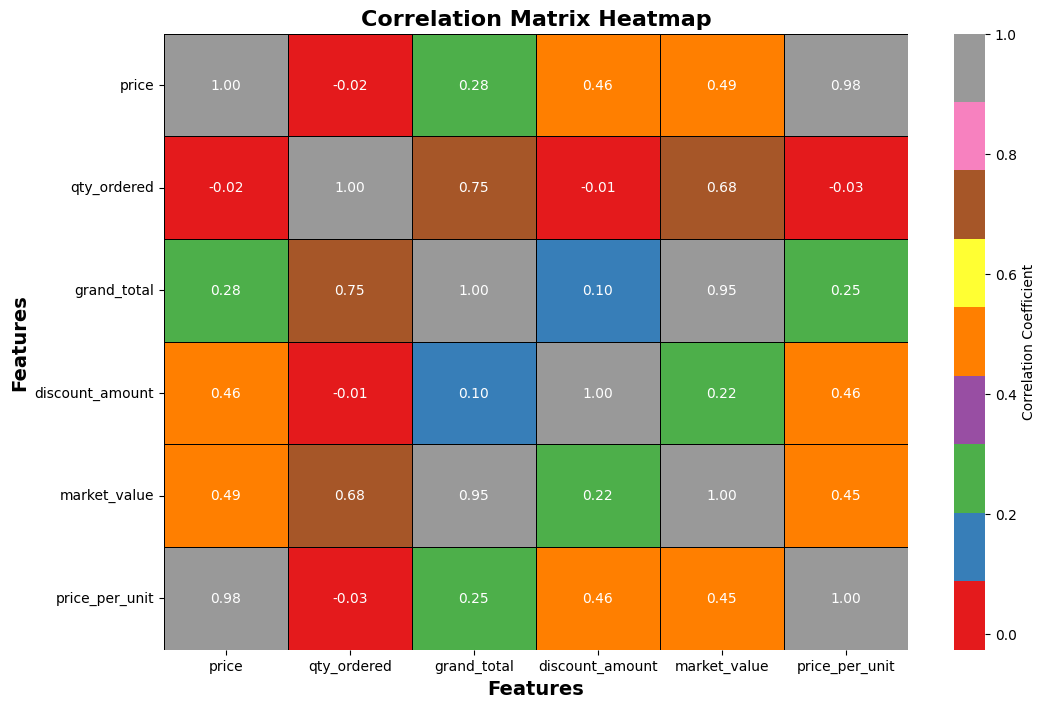

In [ ]:
# Chọn các cột để tính ma trận tương quan
columns_for_correlation = ['price', 'qty_ordered', 'grand_total', 'discount_amount', 'market_value', 'price_per_unit']

# Tính ma trận tương quan
correlation_matrix = df[columns_for_correlation].corr()

# Đặt kích thước biểu đồ
plt.figure(figsize=(12, 8))

# Tạo heatmap với các tùy chỉnh
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Set1", linewidths=0.5, linecolor='black', cbar_kws={'label': 'Correlation Coefficient'})

# Thêm tiêu đề và nhãn
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=14, fontweight='bold')
plt.ylabel('Features', fontsize=14, fontweight='bold')


# Hiển thị biểu đồ
plt.show()


## 4. EDA - Phân tích dữ liệu thăm dò

### 4.1 Phân tích xu hướng doanh thu theo thời gian

#### 4.1.1 Phân tích Doanh thi và Số lượng đơn hàng theo thời gian

#### **Câu hỏi: Doanh thu và số đơn hàng thay đổi như thế nào qua các tháng và các năm?**

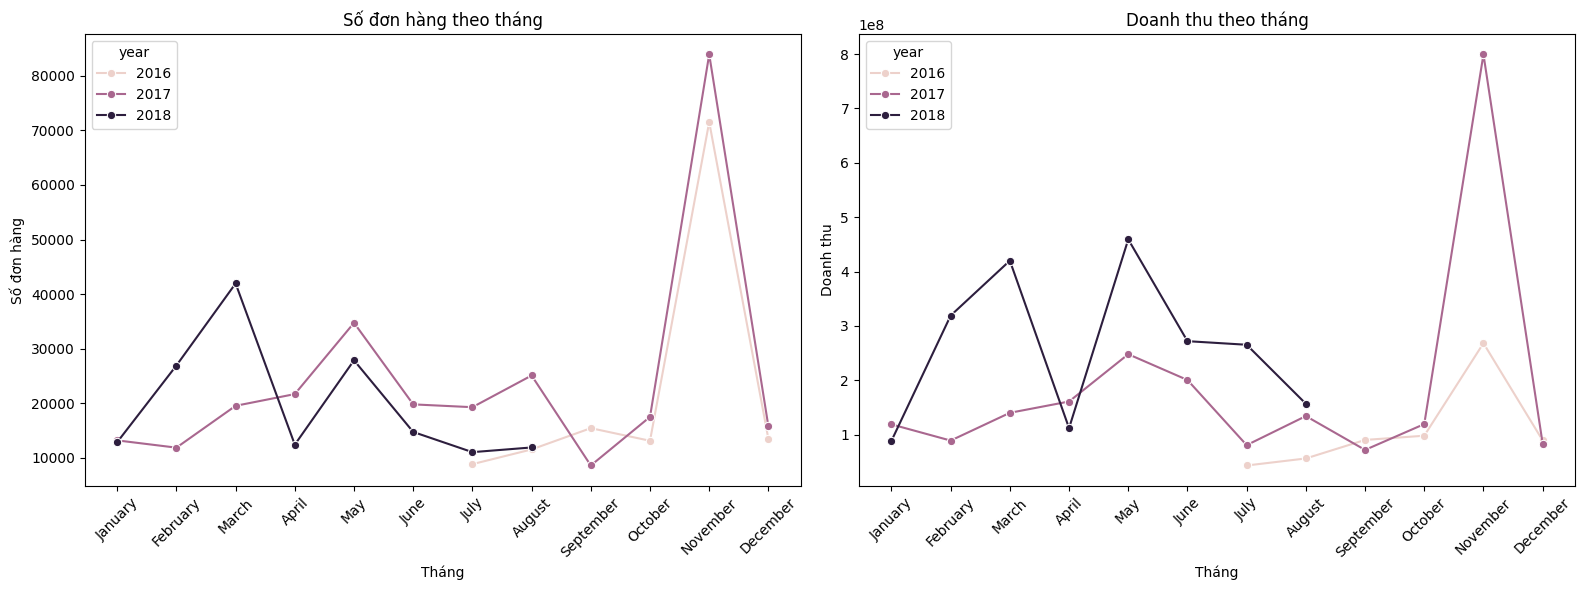

In [ ]:
# Chuyển đổi định dạng ngày tháng
df['created_at'] = pd.to_datetime(df['created_at'])

# Nhóm dữ liệu theo năm và tên tháng
monthly_trend = df.groupby(['year', 'month_name']).agg({
    'item_id': 'count',
    'grand_total': 'sum'
}).reset_index().rename(columns={'item_id': 'order_count'})

# Sắp xếp thứ tự tháng
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_trend['month_name'] = pd.Categorical(monthly_trend['month_name'], categories=month_order, ordered=True)
monthly_trend = monthly_trend.sort_values(['year', 'month_name'])

# Tạo biểu đồ
plt.figure(figsize=(16, 6))

# Biểu đồ số đơn hàng theo tháng
plt.subplot(1, 2, 1)
sns.lineplot(data=monthly_trend, x='month_name', y='order_count', hue='year', marker='o')
plt.title('Số đơn hàng theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Số đơn hàng')
plt.xticks(rotation=45)

# Biểu đồ doanh thu theo tháng
plt.subplot(1, 2, 2)
sns.lineplot(data=monthly_trend, x='month_name', y='grand_total', hue='year', marker='o')
plt.title('Doanh thu theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Doanh thu')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Xu hướng Số đơn hàng**

- Có sự tăng trưởng theo mùa, đặc biệt vào các tháng như Tháng 6, Tháng 11 và Tháng 12, thường là mùa mua sắm (giảm giá giữa năm và cuối năm).

- Một số tháng như Tháng 1 và Tháng 2 có đơn hàng thấp hơn, có thể do sau kỳ nghỉ Tết hoặc đầu năm tài chính.

**Xu hướng Doanh thu**

- Doanh thu cũng phản ánh xu hướng tương tự như số đơn hàng, với các đỉnh vào cuối năm và giữa năm.

- Tuy nhiên, một số năm có doanh thu cao hơn mặc dù số đơn hàng không tăng tương ứng — điều này cho thấy có thể là do khách hàng mua sản phẩm giá trị cao hơn.

### 4.2 Phân tích xu hướng theo Danh mục Sản phẩm

#### 4.2.1 Phân tích Danh mục sản phẩm theo số lượng đơn hàng

#### **Câu hỏi: Danh mục sản phẩm bán chạy nhất?**

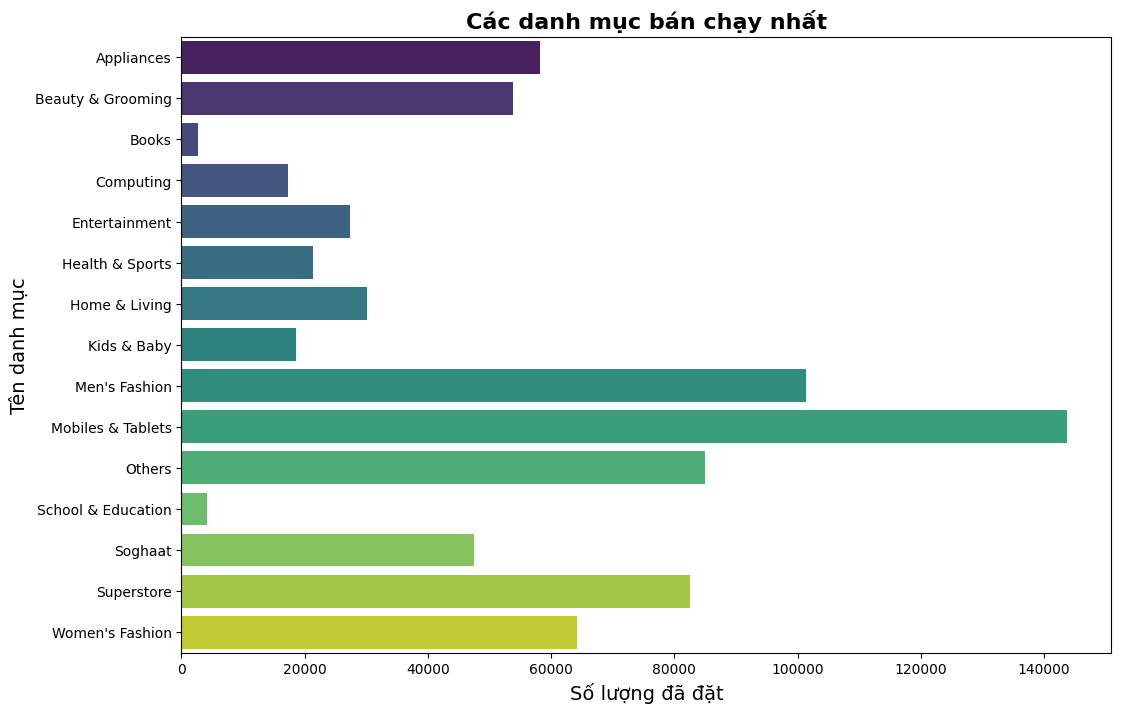

In [ ]:
# Nhóm theo category_name và tính tổng số lượng đã đặt
category_sales = df.groupby('category_name')['qty_ordered'].sum().reset_index()

# Vẽ biểu đồ kết quả
plt.figure(figsize=(12, 8))
sns.barplot(x='qty_ordered', y='category_name', data=category_sales, palette='viridis')
plt.title('Các danh mục bán chạy nhất', fontsize=16, fontweight='bold')
plt.xlabel('Số lượng đã đặt', fontsize=14)
plt.ylabel('Tên danh mục', fontsize=14)
plt.show()


- Các danh mục như "Mobiles & Tablets" và "Men's Fashion" cho thấy hiệu suất vượt trội, có khả năng là những động lực tăng trưởng doanh thu chính. Việc tập trung vào các mặt hàng công nghệ và thời trang nam dường như đang mang lại kết quả tốt.

- Vì vậy hãy tập trung kho hàng và quảng cáo cho nhóm sản phẩm top đầu.

#### 4.2.2 Phân tích Danh mục sản phẩm theo doanh thu và chiết khấu

#### **Câu hỏi: Chiến dịch giảm giá nào hiệu quả nhất theo danh mục?**

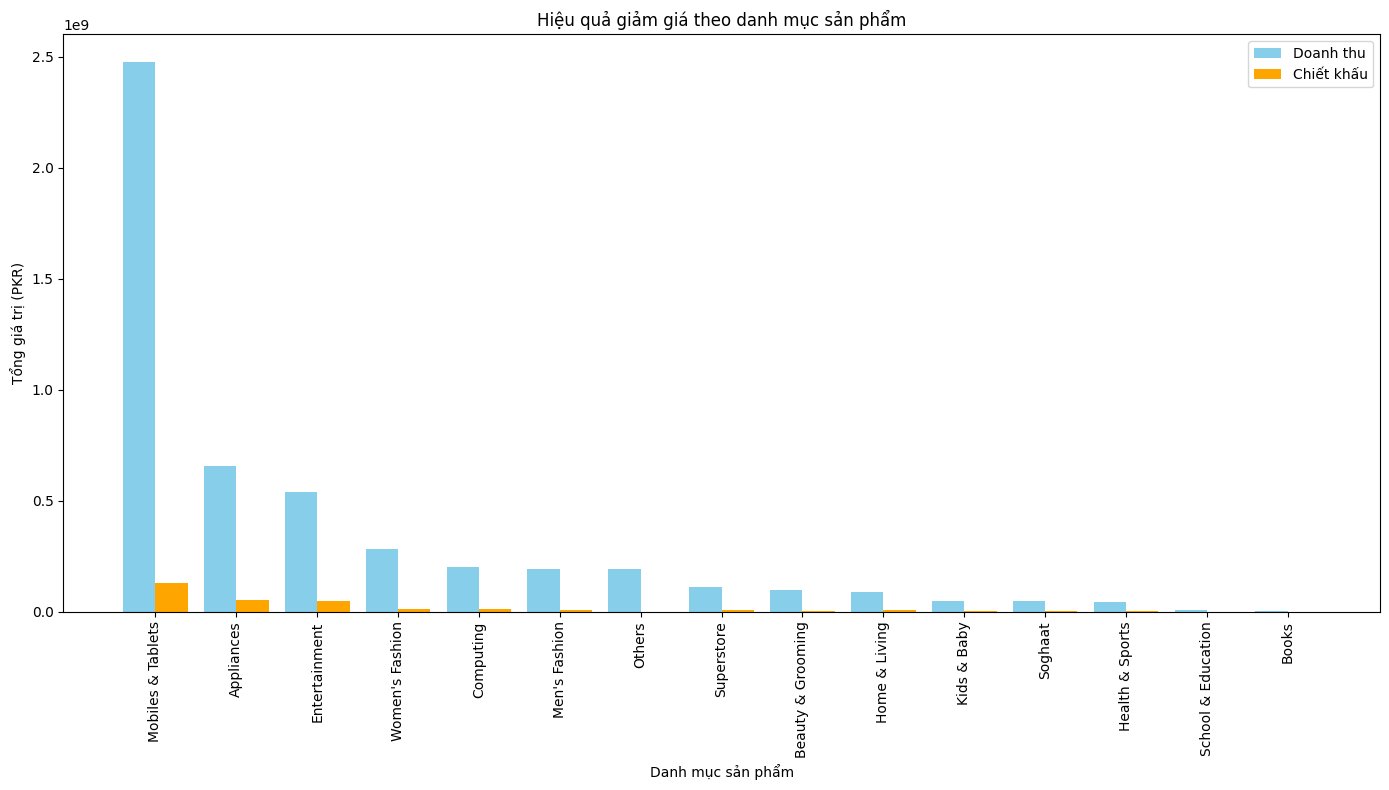

In [ ]:
# Nhóm theo danh mục sản phẩm
discount_analysis = df.groupby('category_name').agg({
    'grand_total': 'sum',
    'discount_amount': 'sum'
}).reset_index()

# Chỉ giữ lại những danh mục có doanh thu đáng kể (lọc nhiễu)
discount_analysis = discount_analysis[discount_analysis['grand_total'] > 100000]

# Sắp xếp theo tổng doanh thu
discount_analysis = discount_analysis.sort_values(by='grand_total', ascending=False)

# Thiết lập kích thước và màu sắc
plt.figure(figsize=(14, 8))
bar_width = 0.4
x = range(len(discount_analysis))

# Vẽ cột doanh thu
plt.bar(x, discount_analysis['grand_total'], width=bar_width, label='Doanh thu', color='skyblue')

# Vẽ cột chiết khấu (chồng lên)
plt.bar([i + bar_width for i in x], discount_analysis['discount_amount'], width=bar_width, label='Chiết khấu', color='orange')

# Gán nhãn
plt.xlabel('Danh mục sản phẩm')
plt.ylabel('Tổng giá trị (PKR)')
plt.title('Hiệu quả giảm giá theo danh mục sản phẩm')
plt.xticks([i + bar_width / 2 for i in x], discount_analysis['category_name'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

Dựa trên số liệu về tổng doanh thu được tạo ra trong kỳ có áp dụng chiết khấu, danh mục **Mobiles & Tablets** thể hiện "hiệu quả" cao nhất về mặt tạo ra tổng doanh thu lớn nhất đi kèm với mức chiết khấu cao nhất. Các danh mục **Appliances và Entertainment** xếp sau.

Tuy nhiên, cần phân tích sâu hơn để đánh giá hiệu quả thực sự về mặt lợi nhuận hoặc hiệu quả sử dụng ngân sách chiết khấu.

### 4.3 Phân tích Phương thức Thanh toán

#### 4.3.1 Phân tích Phương thức thanh toán theo tần suất sử dụng

#### **Câu hỏi: Phương thức thanh toán ưa thích nhất (phổ biến nhất) của khách hàng là gì ?**

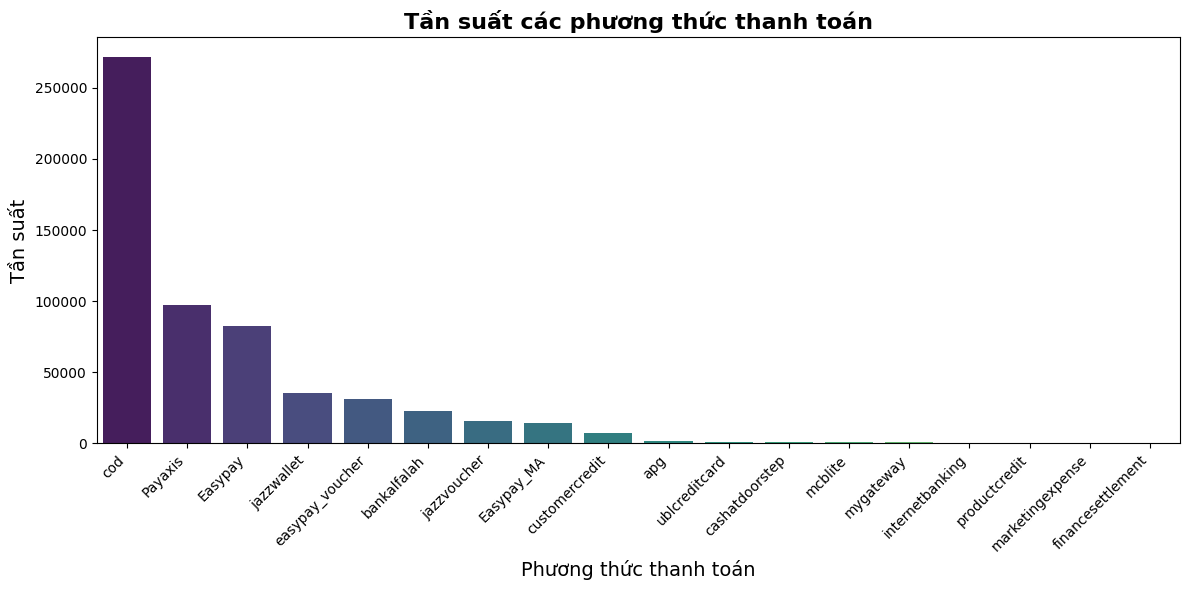

In [ ]:
# Trực quan hóa tần suất các phương thức thanh toán
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='payment_method', palette='viridis', order=df['payment_method'].value_counts().index)
plt.title('Tần suất các phương thức thanh toán', fontsize=16, fontweight='bold')
plt.xlabel('Phương thức thanh toán', fontsize=14)
plt.ylabel('Tần suất', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



- Dựa trên biểu đồ "**Tần suất các phương thức thanh toán**", phương thức thanh toán được ưa thích nhất (phổ biến nhất) của khách hàng là "**cod**" (Cash on Delivery - Thanh toán khi nhận hàng).

-  **Sự thống trị của COD**: Biểu đồ cho thấy sự ưa chuộng áp đảo của phương thức thanh toán khi nhận hàng (COD). Điều này có thể phản ánh một số yếu tố như sự tin tưởng của khách hàng (họ muốn kiểm tra hàng trước khi trả tiền), thói quen mua sắm, hoặc hạn chế trong việc tiếp cận/sử dụng các phương thức thanh toán kỹ thuật số.
- **Tiềm năng của thanh toán số**: Mặc dù COD chiếm ưu thế lớn, sự hiện diện và tần suất sử dụng của một số ví điện tử/cổng thanh toán như Payaxis, Easypay, Jazzwallet cho thấy xu hướng sử dụng thanh toán kỹ thuật số đang hình thành và có tiềm năng phát triển.
- **Đa dạng nhưng thiếu tập trung**: Nền tảng/thị trường này cung cấp rất nhiều lựa chọn thanh toán, nhưng phần lớn trong số đó có tần suất sử dụng rất thấp. Điều này có thể dẫn đến sự phức tạp trong quản lý mà không mang lại hiệu quả sử dụng tương xứng.
- **Ý nghĩa hoạt động**: Sự phổ biến của COD đặt ra yêu cầu cao về quy trình vận chuyển, thu tiền và quản lý dòng tiền cho doanh nghiệp.

- **Cơ hội**: Việc thúc đẩy các phương thức thanh toán không dùng tiền mặt (ví dụ: thông qua ưu đãi, tăng cường sự tin cậy, đơn giản hóa quy trình) có thể giúp giảm chi phí vận hành liên quan đến COD và khuyến khích hành vi mua sắm trực tuyến liền mạch hơn.

#### 4.3.2 Phân tích Phương thức thanh toán theo giá trị đơn hàng

#### **Câu hỏi: Giá trị đơn hàng có khác nhau theo phương thức thanh toán không?**

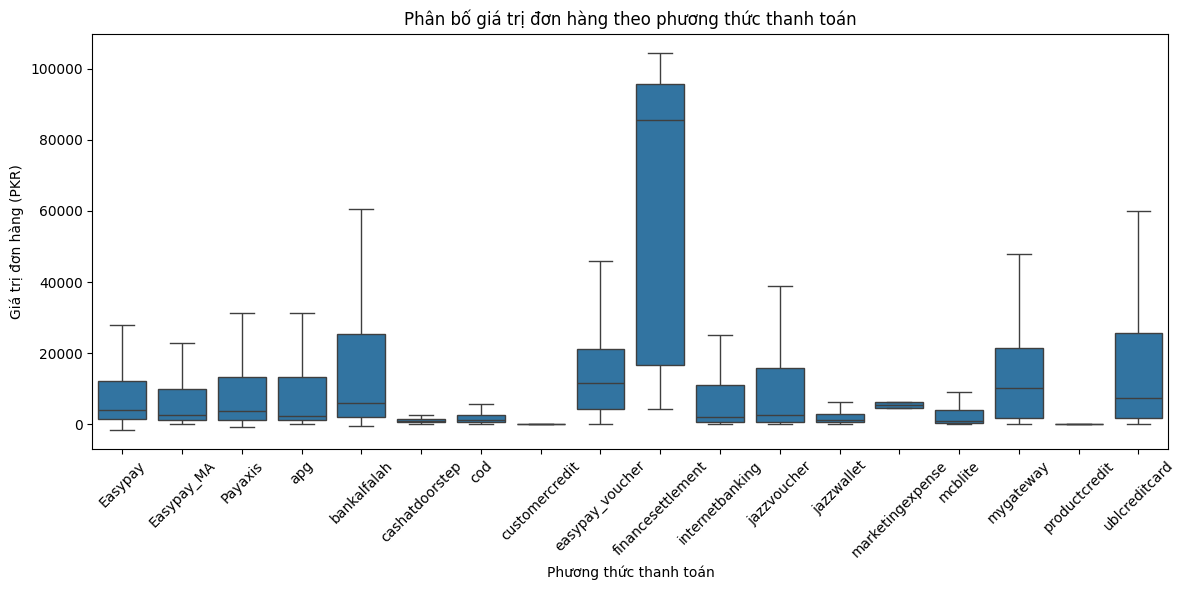

Thống kê giá trị đơn hàng theo phương thức thanh toán:

                    min       max   mean   count
payment_method                                  
financesettlement  4212    389459 101645      15
mygateway             1   1155966  31796     669
bankalfalah        -340   1028751  29841   23065
ublcreditcard         1   1279980  24883     882
easypay_voucher       0    396832  17991   31176
jazzvoucher           0  17888000  16112   15633
apg                   2    506847  15396    1758
internetbanking       1    535400  15292     472
mcblite               1   1280473  11780     723
Payaxis            -873    599599  11671   97640
Easypay           -1594    888065  11052   82896
Easypay_MA            0   1315875   7764   14027
cashatdoorstep        8   1039479   6302     732
marketingexpense   1260     16200   5845      45
jazzwallet            0  17888000   4627   35145
cod                   0    112149   3918  271926
customercredit        0     59700     17    7555
productcredit

In [ ]:
# Vẽ boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='payment_method', y='grand_total', showfliers=False)
plt.title("Phân bố giá trị đơn hàng theo phương thức thanh toán")
plt.xlabel("Phương thức thanh toán")
plt.ylabel("Giá trị đơn hàng (PKR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# In ra giá trị thấp nhất và cao nhất theo từng phương thức thanh toán
summary = df.groupby('payment_method')['grand_total'].agg(['min', 'max', 'mean', 'count']).sort_values(by='mean', ascending=False)
print("Thống kê giá trị đơn hàng theo phương thức thanh toán:\n")
print(summary)

- **COD**: Phổ biến số 1, nhưng giá trị đơn hàng thấp: COD là phương thức được khách hàng sử dụng nhiều nhất, nhưng lại đi kèm với giá trị đơn hàng trung bình thấp nhất trong số các phương thức thanh toán cho đơn hàng thực tế. Điều này cho thấy khách hàng có xu hướng sử dụng COD cho các giao dịch giá trị nhỏ, có thể vì sự tiện lợi hoặc tâm lý muốn kiểm tra hàng trước khi trả tiền đối với các đơn hàng ít rủi ro hơn về mặt giá trị.

- **Thanh toán điện tử**: Ít phổ biến hơn, nhưng giá trị đơn hàng cao hơn: Các phương thức thanh toán điện tử/trực tuyến có tần suất sử dụng thấp hơn nhiều so với COD, nhưng lại được sử dụng cho các đơn hàng có giá trị trung bình cao hơn đáng kể. Điều này gợi ý rằng khách hàng sẵn sàng sử dụng thanh toán trực tuyến cho các đơn hàng giá trị lớn hơn, có thể vì sự tiện lợi khi giao dịch số tiền lớn, hoặc họ có mức độ tin cậy cao hơn khi mua các mặt hàng đắt tiền.
- **Cơ hội thúc đẩy giá trị đơn hàng qua thanh toán điện tử**: Để tăng doanh thu trung bình trên mỗi giao dịch, doanh nghiệp có thể tập trung khuyến khích khách hàng sử dụng các phương thức thanh toán điện tử, đặc biệt là các phương thức có giá trị trung bình cao như easypay_voucher, ublcreditcard, mygateway, bankalfalah. Các chiến dịch khuyến mãi cho đơn hàng giá trị cao khi thanh toán bằng các phương thức này có thể hiệu quả.
- **Quản lý rủi ro và chi phí COD**: Tỷ lệ lớn giao dịch giá trị thấp qua COD có thể làm tăng chi phí logistics (phí thu hộ, tỷ lệ hoàn hàng). Việc tìm cách chuyển đổi một phần giao dịch COD sang thanh toán điện tử (dù là các giao dịch nhỏ) có thể giúp tối ưu chi phí hoạt động.
- **Lưu ý về dữ liệu đặc biệt**: Cần xử lý hoặc phân tích riêng các "phương thức" như financesettlement, customercredit, productcredit vì chúng không đại diện cho hành vi thanh toán mua hàng thông thường của đa số khách hàng cá nhân. Các giá trị âm cần được điều tra để hiểu rõ chúng có phải là hoàn tiền hay không và ảnh hưởng thế nào đến số liệu trung bình.

Tóm lại, biểu đồ và dữ liệu cho thấy có sự phân hóa rõ rệt trong hành vi mua sắm dựa trên phương thức thanh toán. COD là vua về số lượng giao dịch nhưng cho đơn hàng giá trị nhỏ, trong khi thanh toán điện tử mặc dù ít được dùng hơn lại gắn liền với các giao dịch giá trị cao hơn. Điều này là thông tin quan trọng để xây dựng chiến lược kinh doanh và thanh toán phù hợp

### 4.4 Phân tích trạng thái đơn hàng

#### 4.4.1 Phân tích Trạng thái đơn hàng theo tần suất

#### **Câu hỏi: Tình hình các đơn hàng như thế nào?**

##### Để có cái nhìn tổng quan về quy trình xử lý đơn hàng, hãy cùng xem xét tần suất của các trạng thái đơn hàng như hoàn thành, đã hủy, đang xử lý, v.v.

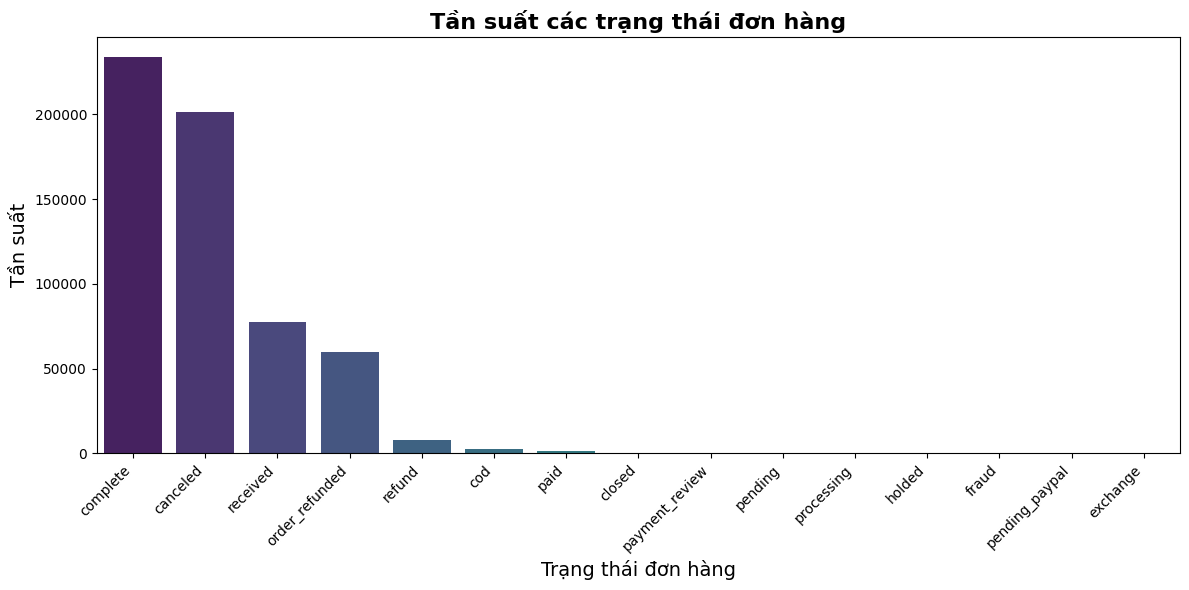

In [ ]:
# Trực quan hóa tần suất các trạng thái đơn hàng
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='status', palette='viridis', order=df['status'].value_counts().index)
plt.title('Tần suất các trạng thái đơn hàng', fontsize=16, fontweight='bold')
plt.xlabel('Trạng thái đơn hàng', fontsize=14)
plt.ylabel('Tần suất', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


- **complete (Hoàn thành)**: Chiếm tần suất cao nhất, cho thấy số lượng lớn đơn hàng đã được xử lý thành công và kết thúc.
- **Tỷ lệ hủy đơn hàng cao đáng ngại**: Điểm đáng chú ý nhất từ biểu đồ là số lượng đơn hàng bị "canceled" gần tương đương với số lượng đơn hàng "complete".
- **Lượng đơn hàng bị hoàn tiền đáng kể**: Số lượng đơn hàng bị "order_refunded" và "refund" cũng khá cao.
- **Quy trình xử lý trung gian có vẻ hiệu quả**: Tần suất thấp của các trạng thái "pending", "processing", "payment_review" cho thấy hệ thống xử lý đơn hàng (sau khi nhận và trước khi hoàn thành/hủy/hoàn tiền) có vẻ hoạt động tương đối trơn tru, ít bị tắc nghẽn. Tuy nhiên, có thể vấn đề nằm ở các khâu trước hoặc sau quy trình xử lý cốt lõi này (ví dụ: lúc đặt hàng dẫn đến hủy, hoặc sau khi nhận hàng dẫn đến hoàn tiền).

- **Các vấn đề nghiêm trọng (Fraud) ở mức thấp**: Tần suất rất thấp của trạng thái "fraud" là một tín hiệu tích cực, cho thấy hệ thống kiểm soát gian lận đang hoạt động tốt hoặc tỷ lệ gian lận vốn dĩ thấp.

Số lượng đơn hàng hoàn thành là cao nhất. Tuy nhiên, tỷ lệ đơn hàng bị hủy và hoàn tiền ở mức rất cao là điểm cần đặc biệt lưu tâm. Để nâng cao hiệu quả kinh doanh và sự hài lòng của khách hàng, doanh nghiệp cần tập trung điều tra nguyên nhân gốc rễ của tỷ lệ hủy và hoàn tiền cao này, từ đó đưa ra các biện pháp cải thiện phù hợp trong quy trình bán hàng, thông tin sản phẩm, logistics, và chính sách hậu mãi. Quy trình xử lý đơn hàng ở các khâu trung gian có vẻ đang hoạt động khá hiệu quả.

#### 4.4.2 **Mối quan hệ giữa phương thức thanh toán, giá trị đơn hàng và tình trạng đơn hàng**

Mục tiêu: Xem liệu có sự khác biệt về giá trị trung bình đơn hàng giữa các phương thức thanh toán và tỷ lệ thành công/hủy đơn hàng khác nhau không.

Ý nghĩa: Giúp hiểu hành vi thanh toán của khách hàng và tìm ra phương thức dễ gây hủy đơn nhất.

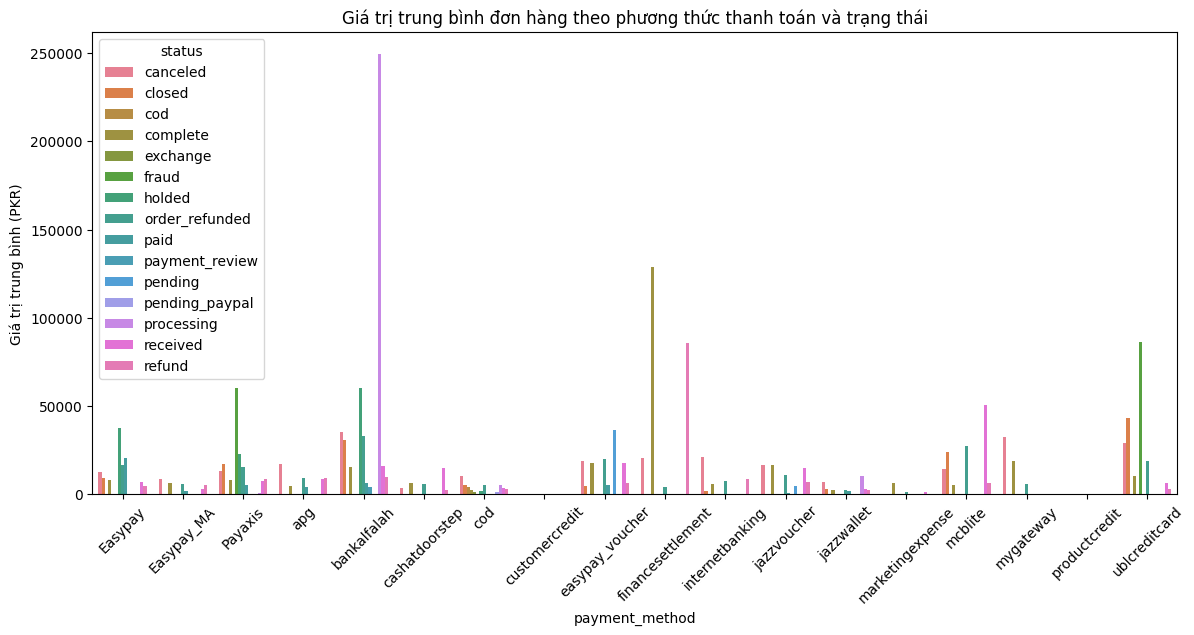

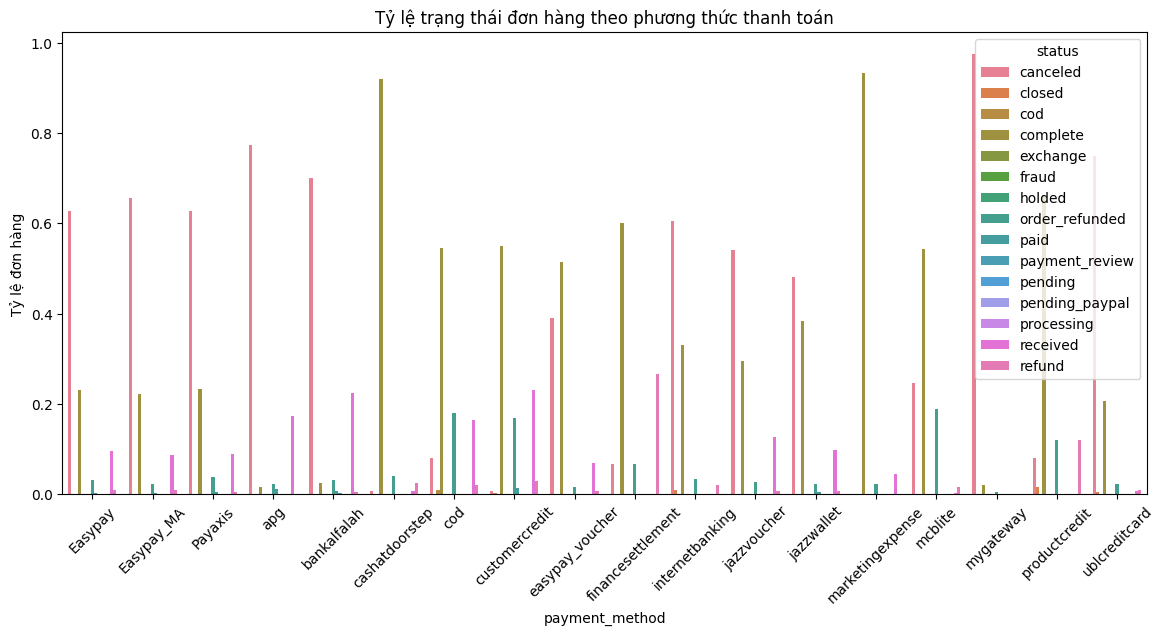

In [ ]:
# Tính giá trị trung bình và tỷ lệ trạng thái theo payment_method
payment_status = df.groupby(['payment_method', 'status']).agg({
    'grand_total': ['mean', 'count']
}).reset_index()
payment_status.columns = ['payment_method', 'status', 'avg_grand_total', 'count']

# Tổng số đơn theo payment_method để tính tỷ lệ
total_orders = df.groupby('payment_method')['item_id'].count().reset_index().rename(columns={'item_id':'total_orders'})

# Gộp để tính tỷ lệ
payment_status = payment_status.merge(total_orders, on='payment_method')
payment_status['order_ratio'] = payment_status['count'] / payment_status['total_orders']

# Vẽ biểu đồ
plt.figure(figsize=(14, 6))

sns.barplot(data=payment_status, x='payment_method', y='avg_grand_total', hue='status')
plt.title('Giá trị trung bình đơn hàng theo phương thức thanh toán và trạng thái')
plt.ylabel('Giá trị trung bình (PKR)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(data=payment_status, x='payment_method', y='order_ratio', hue='status')
plt.title('Tỷ lệ trạng thái đơn hàng theo phương thức thanh toán')
plt.ylabel('Tỷ lệ đơn hàng')
plt.xticks(rotation=45)
plt.show()

**"Giá trị trung bình đơn hàng theo phương thức thanh toán và trạng thái"**

- **COD (Cash on Delivery)** có lượng đơn hàng rất lớn nhưng giá trị trung bình đơn hàng thấp hơn so với các phương thức như Credit Card hoặc Bank Transfer.

- **Các phương thức thanh toán trực tuyến** (ví dụ: Credit Card, Easypaisa) thường có giá trị đơn hàng trung bình cao hơn, đặc biệt là khi trạng thái đơn hàng là hoàn tất (complete).

Một số phương thức có tỷ lệ đơn hàng bị hủy cao, có thể là do người dùng không tin tưởng hoặc thao tác thanh toán khó khăn.

**Gợi ý chiến lược:**

- Khuyến khích khách hàng sử dụng thẻ tín dụng hoặc thanh toán online bằng cách tặng thêm điểm tích lũy hoặc chiết khấu nhỏ.

- Phân tích thêm lý do hủy đơn hàng theo phương thức để tối ưu hệ thống thanh toán.

**"Tỷ lệ trạng thái đơn hàng theo phương thức thanh toán"**

- **COD (Cash on Delivery)** có tỷ lệ đơn hàng bị hủy cao hơn đáng kể so với các phương thức khác.

- **Các phương thức thanh toán điện tử** như Bank Transfer, Easypaisa, Credit Card có tỷ lệ đơn hàng hoàn tất cao hơn, cho thấy khách hàng thanh toán trước thường cam kết mua hàng hơn.

Một số phương thức hiếm gặp có số liệu lệch hoặc ít mẫu, nên cần kiểm tra kỹ nếu dùng để ra quyết định.

**Gợi ý chiến lược:**

- Cân nhắc giới hạn COD cho các khách hàng mới hoặc đơn hàng có giá trị cao.

- Tăng cường truyền thông lợi ích và an toàn khi thanh toán trực tuyến.

- Phân tích sâu thêm theo khu vực địa lý nếu có dữ liệu, vì hành vi có thể khác nhau theo vùng miền.

### 4.5 Phân tích Khách Hàng

#### 4.5.1 Phân tích Tổng quan khách hàng về mức độ mua sắm

In [ ]:
total_customers = df['customer_id'].nunique()
print(f"Tổng số khách hàng: {total_customers}")

Tổng số khách hàng: 115323


In [ ]:
# Tính tổng chi tiêu theo từng khách hàng
customer_revenue = df.groupby('customer_id')['grand_total'].sum().sort_values(ascending=False)
# Khách hàng có giá trị cao nhất
top_customers = customer_revenue.head(10)
{
    "Top 10 khách hàng chi tiêu nhiều nhất": top_customers.to_dict()
}

{'Top 10 khách hàng chi tiêu nhiều nhất': {5032: 72150376,
  50387: 35776000,
  111057: 31338185,
  109038: 28341357,
  110215: 21969066,
  10654: 19496005,
  113694: 16531260,
  39707: 16463501,
  26527: 12502191,
  8963: 12421422}}

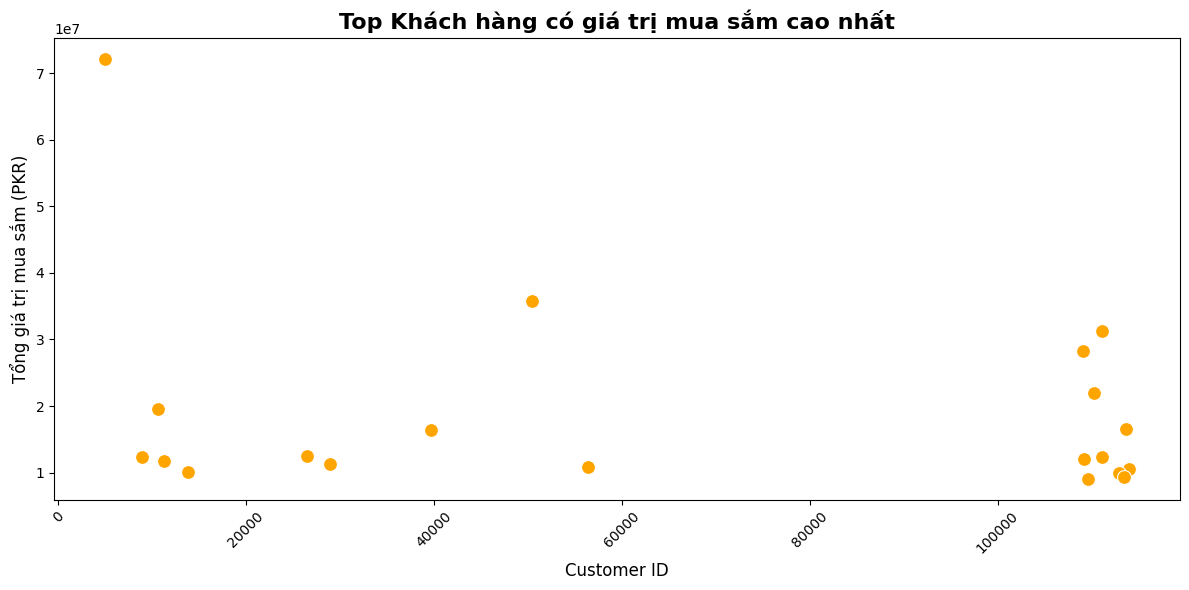

In [ ]:
# Tính tổng chi tiêu của từng khách hàng
customer_total = df.groupby('customer_id')['grand_total'].sum().reset_index()

# Sắp xếp theo giá trị mua sắm cao nhất
top_customers = customer_total.sort_values(by='grand_total', ascending=False).head(20)

# Biểu đồ scatter
plt.figure(figsize=(12, 6))
sns.scatterplot(data=top_customers, x='customer_id', y='grand_total', s=100, color='orange')
plt.title('Top Khách hàng có giá trị mua sắm cao nhất', fontsize=16, fontweight='bold')
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Tổng giá trị mua sắm (PKR)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **Sự tập trung giá trị vào nhóm nhỏ**: Biểu đồ cho thấy rõ ràng rằng trong số 115323 khách hàng, có một nhóm nhỏ (các điểm ở phía trên cùng của biểu đồ) có tổng giá trị mua sắm vượt trội hơn hẳn phần lớn khách hàng còn lại (các điểm sẽ tập trung ở gần trục hoành nếu hiển thị tất cả).

- **Mức chi tiêu khổng lồ của Top Khách hàng**: Danh sách "Top 10 khách hàng chi tiêu nhiều nhất" xác nhận điều này. Khách hàng đứng đầu chi tiêu tới hơn 72 triệu PKR, và nhiều khách hàng khác trong top 10 cũng chi tiêu hàng chục triệu PKR. Mức chi tiêu này cao hơn rất nhiều lần so với giá trị đơn hàng trung bình được phân tích trước đó.

**Đánh giá:**

- **Tầm quan trọng chiến lược của khách hàng VIP**: Sự tồn tại của một nhóm khách hàng nhỏ nhưng có giá trị chi tiêu cực kỳ lớn nhấn mạnh tầm quan trọng chiến lược của phân khúc khách hàng này. Họ là những động lực doanh thu chính và việc giữ chân họ là cực kỳ quan trọng đối với sự thành công lâu dài của doanh nghiệp. Đây là minh chứng rõ ràng cho nguyên lý Pareto (quy tắc 80/20), nơi một tỷ lệ nhỏ khách hàng tạo ra phần lớn doanh thu.

- **Cơ hội cá nhân hóa và xây dựng mối quan hệ**: Việc xác định được những khách hàng này cho phép doanh nghiệp triển khai các chương trình chăm sóc khách hàng đặc biệt (VIP), ưu đãi cá nhân hóa, hoặc các dịch vụ độc quyền để tăng cường lòng trung thành và khuyến khích họ tiếp tục mua sắm.

- **Tiềm năng nhân rộng**: Phân tích sâu hơn về hành vi mua sắm (loại sản phẩm mua, tần suất, phản ứng với khuyến mãi) của nhóm khách hàng top đầu có thể giúp xác định các đặc điểm chung và từ đó xây dựng chiến lược thu hút hoặc chuyển đổi những khách hàng tiềm năng khác thành khách hàng giá trị cao.

- **Thách thức duy trì**: Mặc dù họ chi tiêu nhiều, không có gì đảm bảo họ sẽ tiếp tục làm như vậy. Cạnh tranh, trải nghiệm không tốt, hoặc thiếu sự công nhận có thể khiến họ chuyển sang đối thủ. Do đó, việc liên tục theo dõi, chăm sóc và đáp ứng nhu cầu của nhóm khách hàng này là cần thiết.

#### **Câu hỏi: Dựa trên giá trị mua sắm tổng thể, khách hàng của chúng ta được phân loại vào các nhóm giá trị khác nhau như thế nào?**

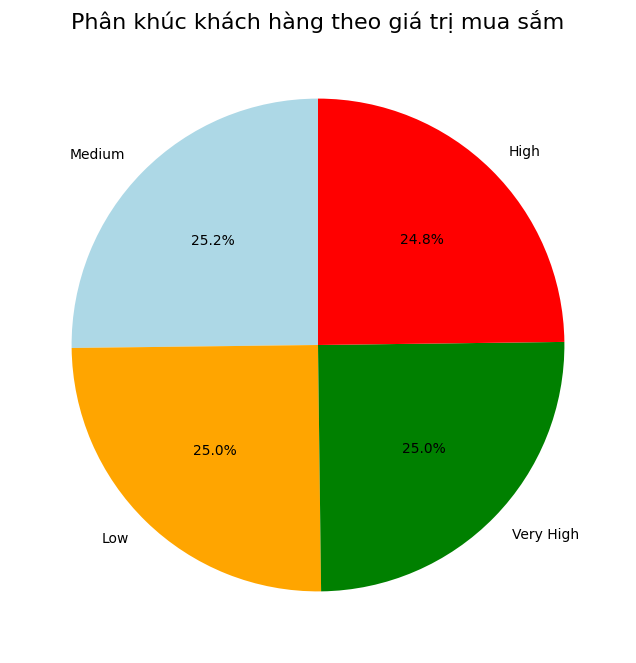

In [ ]:
# Tổng giá trị mua sắm của mỗi khách hàng
customer_total_spent = df.groupby('customer_id')['grand_total'].sum()

# Phân nhóm khách hàng
customer_total_spent = customer_total_spent.sort_values(ascending=False)
segments = pd.qcut(customer_total_spent, q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Biểu đồ phân phối phân khúc khách hàng
plt.figure(figsize=(8, 8))
segments.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange', 'green', 'red'])
plt.title('Phân khúc khách hàng theo giá trị mua sắm', fontsize=16)
plt.ylabel('')
plt.show()

- **Phân bố khách hàng cân bằng đáng ngạc nhiên**: Điểm đáng chú ý nhất từ biểu đồ này là sự phân bố tỷ lệ khách hàng gần như đồng đều giữa tất cả bốn phân khúc giá trị mua sắm. Mỗi phân khúc đều chiếm khoảng một phần tư (25%) tổng số khách hàng. Đây là một cấu trúc phân khúc khách hàng khá cân bằng, khác biệt so với nhiều mô hình kinh doanh điển hình thường có số lượng lớn khách hàng ở phân khúc giá trị thấp.

- **Tỷ trọng lớn khách hàng giá trị cao**: Tổng cộng, 50% khách hàng thuộc vào hai phân khúc giá trị cao nhất (High và Very High). Điều này cho thấy doanh nghiệp có một lượng lớn khách hàng đóng góp giá trị đáng kể vào doanh thu. Đây là một tài sản quý báu.

- **Cơ hội phát triển ở phân khúc thấp hơn**: Mặc dù có lượng lớn khách hàng giá trị cao, 50% còn lại thuộc phân khúc Low và Medium cũng là một nhóm khách hàng tiềm năng. Kích thước đáng kể của hai phân khúc này tạo cơ hội để doanh nghiệp triển khai các chiến lược nhằm tăng giá trị mua sắm trung bình của họ theo thời gian (ví dụ: khuyến mãi mua kèm, chương trình tích điểm, gợi ý sản phẩm giá trị cao hơn).

- **Ý nghĩa chiến lược quản lý khách hàng**: Cấu trúc phân khúc cân bằng này đòi hỏi một chiến lược quản lý khách hàng đa dạng. Doanh nghiệp cần có các chương trình và ưu đãi riêng biệt cho từng nhóm:
  - **Nhóm High & Very High**: Tập trung vào việc duy trì mối quan hệ, tăng cường lòng trung thành, và có thể cung cấp các dịch vụ/lợi ích độc quyền (ví dụ: chương trình khách hàng thân thiết cao cấp, ưu đãi đặc biệt).

  - **Nhóm Medium & Low**: Áp dụng các chiến lược để khuyến khích mua sắm thường xuyên hơn hoặc mua các sản phẩm giá trị cao hơn (ví dụ: khuyến mãi theo giá trị đơn hàng, gợi ý sản phẩm cá nhân hóa, email marketing nhắm mục tiêu).

**Hạn chế về định nghĩa phân khúc**: Biểu đồ không cung cấp thông tin về ngưỡng giá trị mua sắm cụ thể để phân loại khách hàng vào từng phân khúc (ví dụ: giá trị từ X đến Y là Low, từ Y đến Z là Medium,...). Việc thiếu thông tin này khiến việc đánh giá chi tiết hơn về đặc điểm của từng nhóm (ngoài tỷ lệ) trở nên khó khăn. Cần có định nghĩa rõ ràng về từng phân khúc để hiểu sâu hơn và xây dựng chiến lược chính xác.

#### 4.5.2 Phân tích Trạng thái đơn hàng đối với danh mục sản phẩm

#### **Câu hỏi: Trạng thái đơn hàng (như hoàn thành, đã hủy, hoàn tiền) phân bố như thế nào đối với các sản phẩm trong từng danh mục cụ thể?**

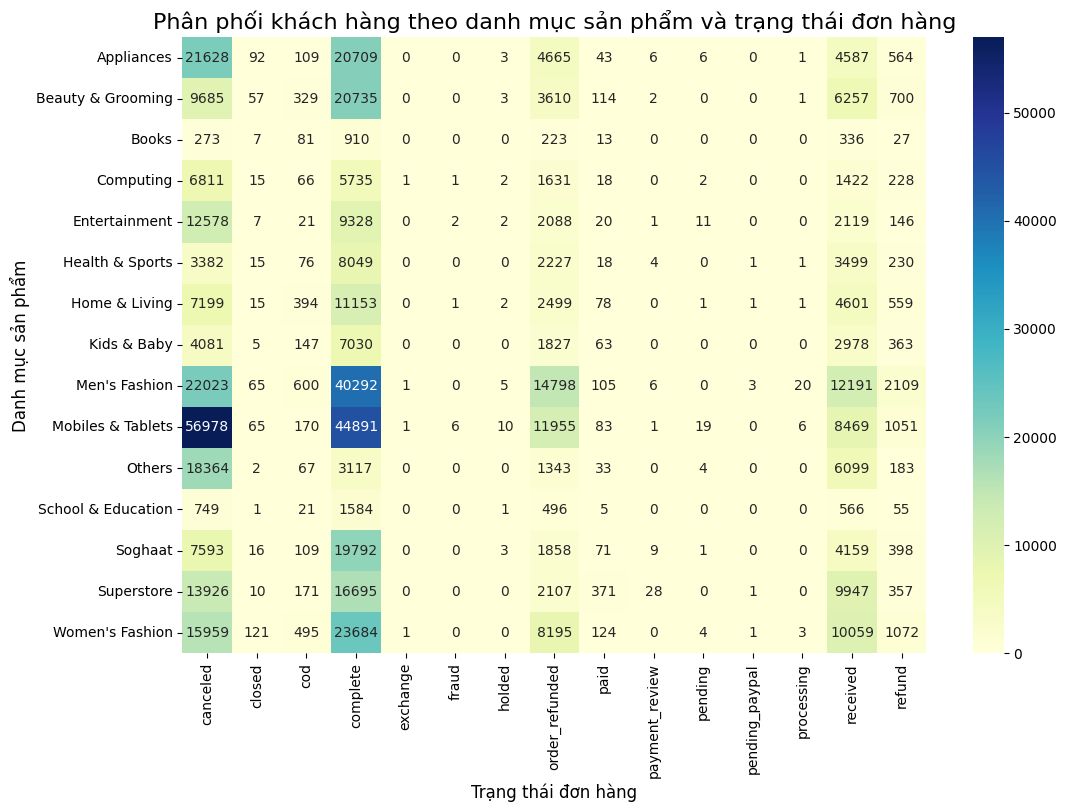

In [ ]:
# Tạo bảng tổng hợp
category_status = df.groupby(['category_name', 'status']).size().unstack(fill_value=0)

# Biểu đồ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(category_status, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Phân phối khách hàng theo danh mục sản phẩm và trạng thái đơn hàng', fontsize=16)
plt.xlabel('Trạng thái đơn hàng', fontsize=12)
plt.ylabel('Danh mục sản phẩm', fontsize=12)
plt.show()

- **Nổi bật nhất là ô "Mobiles & Tablets" - "complete"**, cho thấy Điện thoại & Máy tính bảng là danh mục có số lượng đơn hàng hoàn thành cao nhất.
Tiếp theo là ô "Mobiles & Tablets" - "canceled" (xanh đậm thứ hai), cho thấy danh mục này cũng có số lượng đơn hàng bị hủy cao nhất, gần bằng số đơn hàng hoàn thành.

- **Các ô có tần suất cao khác bao gồm: "Men's Fashion" - "complete", "Men's Fashion" - "canceled", "Mobiles & Tablets" - "received", "Men's Fashion" - "received"**.
- **Các ô có tần suất trung bình khá như: "Mobiles & Tablets" - "order_refunded", "Men's Fashion" - "order_refunded", "Appliances" - "complete", "Women's Fashion" - "complete", "Appliances" - "canceled", "Women's Fashion" - "canceled", "Others" - "complete", "Superstore" - "complete".**

- **"Điện thoại & Máy tính bảng" và "Thời trang Nam"**: Con dao hai lưỡi: Các danh mục này là động lực doanh thu chính với số lượng đơn hàng hoàn thành cao nhất. Tuy nhiên, chúng cũng là nguồn gốc chính của các đơn hàng bị hủy và hoàn tiền về mặt số lượng tuyệt đối. Điều này cho thấy sự phổ biến và nhu cầu cao, nhưng đồng thời tồn tại những vấn đề đáng kể trong quy trình bán hàng hoặc sản phẩm ở các danh mục này, dẫn đến tỷ lệ đơn hàng không thành công cao.

- **Cần điều tra nguyên nhân hủy/hoàn tiền theo danh mục**: Tỷ lệ hủy/hoàn tiền cao ở "Mobiles & Tablets" có thể do giá trị sản phẩm lớn, rủi ro cao hơn khi mua sắm trực tuyến, hoặc kỳ vọng của khách hàng không được đáp ứng. Đối với "Men's Fashion", có thể liên quan đến vấn đề về kích cỡ, chất liệu, hoặc hình ảnh sản phẩm không khớp với thực tế. Việc phân tích sâu nguyên nhân cụ thể cho từng danh mục là cần thiết.

- **Các danh mục khác hoạt động ổn định hơn (về số lượng vấn đề tuyệt đối)**: Các danh mục có quy mô vừa và nhỏ hơn có số lượng đơn hàng hủy/hoàn tiền tuyệt đối thấp hơn. Mặc dù tỷ lệ có thể khác nhau, nhưng về mức độ đóng góp vào tổng số vấn đề, chúng ít nghiêm trọng hơn hai danh mục dẫn đầu.

- **Điểm sáng ở các trạng thái xử lý**: Số lượng đơn hàng ở các trạng thái như "pending", "processing", "payment_review" nhìn chung là thấp trên hầu hết các danh mục. Điều này (giống như phân tích biểu đồ trạng thái tổng thể) gợi ý rằng các khâu xử lý trung gian không phải là nơi phát sinh nhiều vấn đề tắc nghẽn. Các vấn đề xảy ra chủ yếu ở đầu (trước khi hoàn thành hoặc bị hủy) hoặc cuối quy trình (sau khi nhận hàng dẫn đến hoàn tiền).

### 4.6 Phân tích Chiết khấu và Lợi nhuận

#### 4.6.1 Phân tích hành vi khách hàng theo từng danh mục


#### **Câu hỏi: Liệu việc giảm giá có thực sự thúc đẩy khách hàng mua nhiều sản phẩm hơn không?**

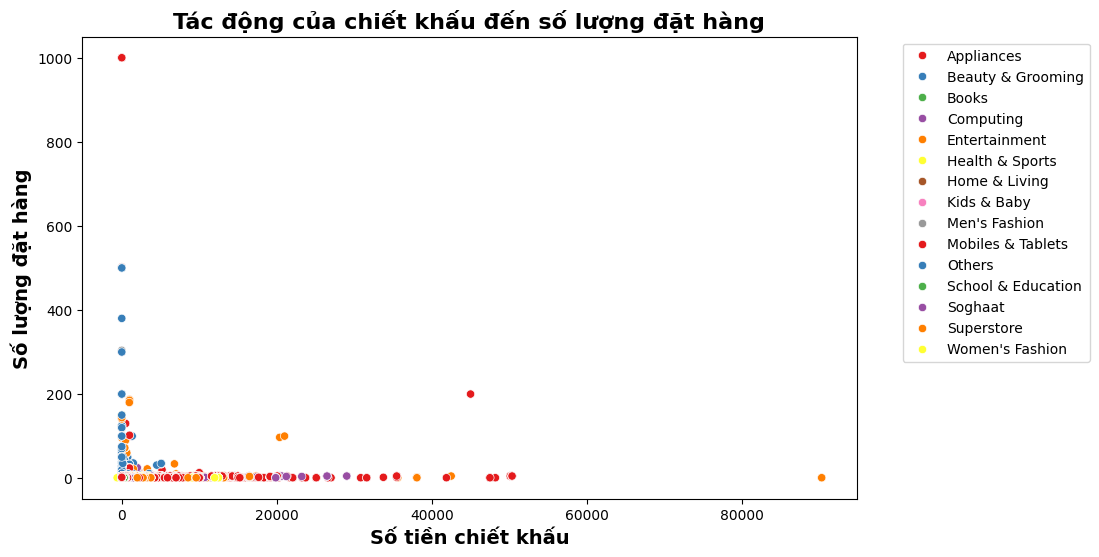

In [ ]:
# Mô hình ẩn: Tác động của chiết khấu đến số lượng đặt hàng
  plt.figure(figsize=(10, 6))  # Thiết lập kích thước biểu đồ

  # Vẽ biểu đồ phân tán giữa số tiền chiết khấu và số lượng đặt hàng, phân biệt theo danh mục sản phẩm
  sns.scatterplot(
    x='discount_amount',                  # Trục X: số tiền chiết khấu
    y='qty_ordered',                      # Trục Y: số lượng sản phẩm được đặt
    data=df,                              # Dữ liệu nguồn
    hue='category_name',                  # Màu sắc theo danh mục sản phẩm
    palette='Set1'                        # Bảng màu Set1 để dễ phân biệt
)

# Thêm tiêu đề và nhãn trục
plt.title('Tác động của chiết khấu đến số lượng đặt hàng', fontsize=16, fontweight='bold')
plt.xlabel('Số tiền chiết khấu', fontsize=14, fontweight='bold')
plt.ylabel('Số lượng đặt hàng', fontsize=14, fontweight='bold')

# Hiển thị chú thích bên phải biểu đồ
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Hiển thị biểu đồ
plt.show()


**Hiệu suất sản phẩm và chiết khấu:**

  - Các danh mục như Mobiles & Tablets và Men's Fashion là những động lực doanh thu chính, thể hiện sự phổ biến vượt trội.

  - Chiết khấu được áp dụng đáng kể, đặc biệt là cho các danh mục hàng đầu như Mobiles & Tablets. Tuy nhiên, phân tích cho thấy chiết khấu không phải là yếu tố duy nhất thúc đẩy số lượng đơn hàng; nhiều danh mục khác (như Appliances, Beauty & Grooming) đạt số lượng đơn hàng cao với mức chiết khấu tối thiểu, đặt ra câu hỏi về hiệu quả chi phí của việc giảm giá.

**Hành vi khách hàng và phương thức thanh toán:**

  - COD (Thanh toán khi nhận hàng) là phương thức thanh toán được ưa chuộng nhất về số lượng giao dịch, phản ánh thói quen hoặc sự tin tưởng của khách hàng.
  - Tuy nhiên, các đơn hàng sử dụng COD có giá trị trung bình thấp hơn đáng kể so với các phương thức thanh toán điện tử/trực tuyến.

  - Quan trọng hơn, tỷ lệ hủy và hoàn tiền có xu hướng cao hơn đối với đơn hàng COD, trong khi thanh toán điện tử liên quan đến tỷ lệ hoàn thành đơn hàng cao hơn, cho thấy khách hàng thanh toán trước có cam kết mua hàng lớn hơn.
  
  - Dữ liệu cũng chỉ ra sự tồn tại của một nhóm khách hàng VIP nhỏ nhưng có giá trị chi tiêu cực kỳ cao, đóng góp đáng kể vào tổng doanh thu.
**Hiệu quả quy trình xử lý đơn hàng:**

  - Số lượng đơn hàng hoàn thành (complete) là cao nhất, nhưng số lượng đơn hàng bị hủy (canceled) cũng ở mức báo động, gần bằng số đơn hàng hoàn thành.
  - Lượng đơn hàng bị hoàn tiền (order_refunded/refund) cũng đáng kể.

  - Phân tích chi tiết theo danh mục cho thấy các danh mục bán chạy nhất (Mobiles & Tablets, Men's Fashion) cũng là những danh mục phát sinh nhiều đơn hàng bị hủy và hoàn tiền nhất về mặt số lượng tuyệt đối.

  - Các trạng thái đơn hàng ở khâu xử lý trung gian (pending, processing) có tần suất thấp, cho thấy quy trình vận hành có vẻ không bị tắc nghẽn ở các bước này, nhưng vấn đề nằm ở trước (dẫn đến hủy) hoặc sau (dẫn đến hoàn tiền) các khâu này.

**Đánh giá tổng thể:**

  Doanh nghiệp đang có một nền tảng với khối lượng giao dịch lớn và các danh mục sản phẩm chủ lực rõ ràng. Tuy nhiên, thách thức lớn nằm ở tỷ lệ đơn hàng không thành công (hủy và hoàn tiền) rất cao, đặc biệt tập trung ở các danh mục bán chạy nhất và gắn liền với phương thức thanh toán COD. Việc nhận diện và chăm sóc nhóm khách hàng giá trị cao là điểm mạnh, nhưng cần chiến lược để vừa giữ chân họ, vừa cải thiện trải nghiệm của khách hàng ở các phân khúc khác và trên các phương thức thanh toán. Tối ưu hóa chiến lược chiết khấu và giải quyết căn nguyên của tỷ lệ hủy/hoàn tiền cao là những ưu tiên hàng đầu để nâng cao hiệu quả hoạt động và lợi nhuận ròng.

#### 4.6.2 Phân tích theo tỷ lệ chiết khấu và lượng đặt hàng

#### Câu hỏi : Giảm giá có thật sự kích thích mua hàng?

Số lượng đặt hàng TRUNG BÌNH theo khoảng chiết khấu:
  discount_bin  qty_ordered
0           0%     1.326614
1        1-10%     1.029783
2       11-20%     1.044323
3       21-30%     1.144843
4       31-40%     1.220763
5       41-50%     1.475929
6       51-75%     1.958686
7         >75%     2.082730

Tổng số lượng đặt hàng theo khoảng chiết khấu:
  discount_bin  qty_ordered
0           0%       499409
1        1-10%        37896
2       11-20%        81429
3       21-30%        38382
4       31-40%        20919
5       41-50%        19590
6       51-75%        15503
7         >75%        44585


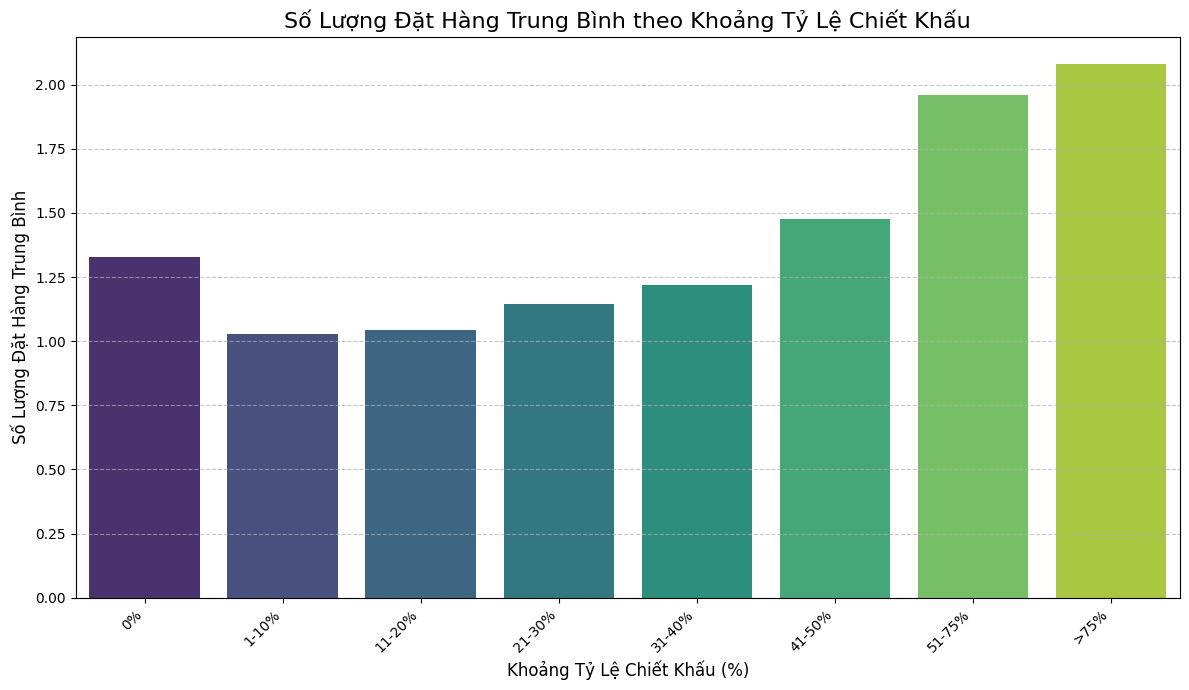

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Để xử lý giá trị inf nếu có

# Giả sử df là DataFrame đã được tải và tiền xử lý, chứa các cột:
# 'discount_percentage' và 'qty_ordered'
# df = pd.read_csv('cleaned_Pakistan Largest Ecommerce Dataset.csv') # Đảm bảo bạn đã đọc file này

# --- Bước 0: Chuẩn bị và làm sạch dữ liệu cho phân tích này ---
df_q8 = df.copy() # Tạo bản sao để thao tác

# Đảm bảo 'discount_percentage' và 'qty_ordered' là kiểu số
df_q8['discount_percentage'] = pd.to_numeric(df_q8['discount_percentage'], errors='coerce')
df_q8['qty_ordered'] = pd.to_numeric(df_q8['qty_ordered'], errors='coerce')

# Xử lý giá trị inf (vô cực) trong 'discount_percentage' nếu có
# (Giá trị inf có thể xuất hiện nếu price=0 khi tính discount_percentage)
df_q8['discount_percentage'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Loại bỏ các dòng có giá trị NaN ở các cột quan trọng cho phân tích này
df_q8.dropna(subset=['discount_percentage', 'qty_ordered'], inplace=True)

# Giới hạn giá trị discount_percentage trong khoảng hợp lý (ví dụ 0-100)
# (Tùy chọn, nếu bạn chắc chắn tỷ lệ không thể > 100% hoặc < 0%)
df_q8['discount_percentage'] = np.clip(df_q8['discount_percentage'], 0, 100)


# --- Bước 1: Tạo các khoảng (bins) cho discount_percentage ---
# Bạn có thể điều chỉnh các khoảng này tùy theo phân phối dữ liệu của bạn
bins = [-0.01, 0, 10, 20, 30, 40, 50, 75, 101] # -0.01 để bao gồm cả giá trị 0
# Tăng giới hạn cuối lên 101 để bao gồm cả 100%
labels = ['0%', '1-10%', '11-20%', '21-30%', '31-40%', '41-50%', '51-75%', '>75%']

# Nếu không có giá trị nào > 75%, bạn có thể điều chỉnh bins/labels cuối cùng
# Ví dụ: bins = [-0.01, 0, 10, 20, 30, 40, 51] và labels = ['0%', '1-10%', ..., '>50%']
# Hoặc dựa trên phân vị của discount_percentage:
# bins = pd.qcut(df_q8['discount_percentage'], q=5, duplicates='drop').unique().categories.right
# labels = [f'{b.left}-{b.right}%' for b in pd.qcut(df_q8['discount_percentage'], q=5, duplicates='drop').unique().categories]


df_q8['discount_bin'] = pd.cut(df_q8['discount_percentage'],
                               bins=bins,
                               labels=labels,
                               right=True, # Khoảng (a, b]
                               include_lowest=True) # Bao gồm giá trị nhỏ nhất


# --- Bước 2: Tính toán số lượng đặt hàng trung bình và tổng số lượng theo từng khoảng chiết khấu ---
# Sử dụng observed=False để đảm bảo tất cả các bins được hiển thị ngay cả khi không có dữ liệu
analysis_q8_avg = df_q8.groupby('discount_bin', observed=False)['qty_ordered'].mean().reset_index()
analysis_q8_sum = df_q8.groupby('discount_bin', observed=False)['qty_ordered'].sum().reset_index()

print("Số lượng đặt hàng TRUNG BÌNH theo khoảng chiết khấu:")
print(analysis_q8_avg)
print("\nTổng số lượng đặt hàng theo khoảng chiết khấu:")
print(analysis_q8_sum)

# --- Bước 3: Vẽ biểu đồ ---

# Biểu đồ 1: Số lượng đặt hàng TRUNG BÌNH theo khoảng chiết khấu
plt.figure(figsize=(12, 7))
sns.barplot(x='discount_bin', y='qty_ordered', data=analysis_q8_avg, palette='viridis', hue='discount_bin', dodge=False, legend=False)
plt.title('Số Lượng Đặt Hàng Trung Bình theo Khoảng Tỷ Lệ Chiết Khấu', fontsize=16)
plt.xlabel('Khoảng Tỷ Lệ Chiết Khấu (%)', fontsize=12)
plt.ylabel('Số Lượng Đặt Hàng Trung Bình', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# (Tùy chọn) Biểu đồ Scatter plot để xem phân bố thô (có thể rất nhiễu)
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='discount_percentage', y='qty_ordered', data=df_q8.sample(min(10000, len(df_q8))), alpha=0.3) # Lấy mẫu nếu dữ liệu quá lớn
# plt.title('Phân bố giữa Tỷ lệ chiết khấu và Số lượng đặt hàng')
# plt.xlabel('Tỷ lệ Chiết Khấu (%)')
# plt.ylabel('Số Lượng Đặt Hàng')
# plt.show()


Nhận xét về Số Lượng Đặt Hàng **TRUNG BÌNH** theo Khoảng Chiết Khấu

- **Xu hướng rõ rệt**:  
  Khi tỷ lệ chiết khấu tăng, người tiêu dùng Pakistan có xu hướng mua số lượng sản phẩm trung bình nhiều hơn trên mỗi dòng sản phẩm.

- **Ngưỡng chiết khấu hiệu quả**:  
  Các mức chiết khấu sâu (đặc biệt **>50%**, với số lượng trung bình **~2 sản phẩm/dòng**) tỏ ra hiệu quả nhất trong việc thúc đẩy khách hàng mua nhiều đơn vị hơn cho một mặt hàng cụ thể.

- **Chiết khấu thấp ít tác động**:  
  Các mức chiết khấu nhỏ (**1-20%**) dường như không làm thay đổi đáng kể số lượng sản phẩm trung bình mua trên mỗi dòng so với khi không có chiết khấu.


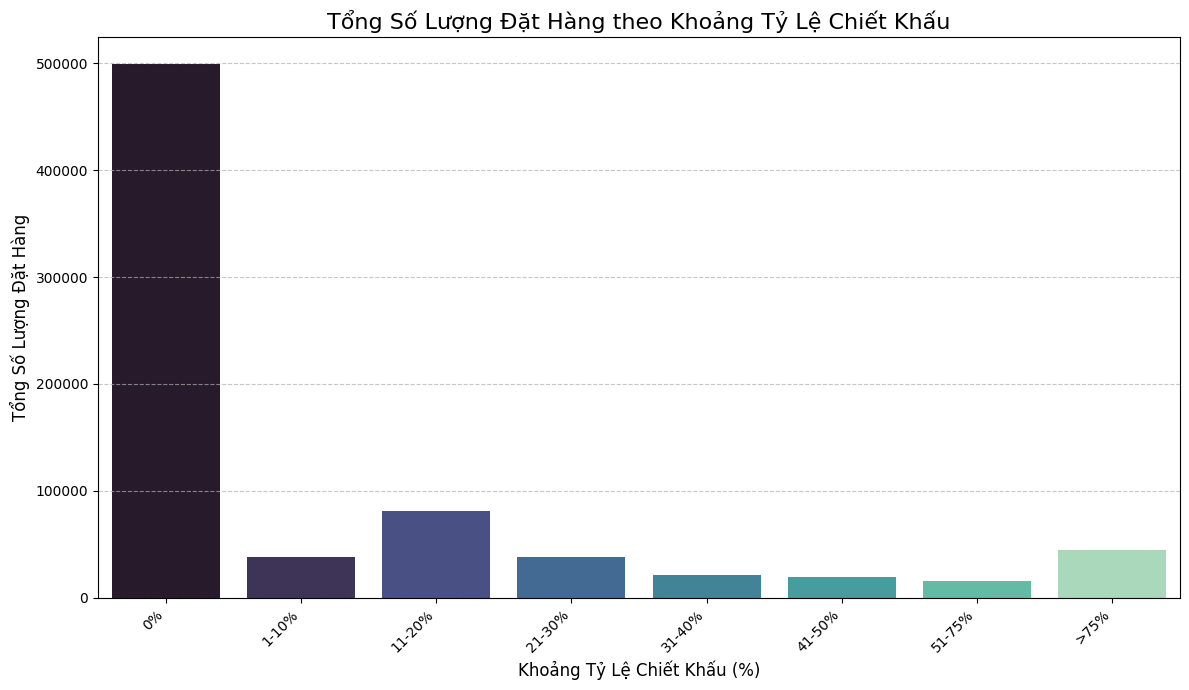

In [ ]:
# Biểu đồ 2: TỔNG số lượng đặt hàng theo khoảng chiết khấu
plt.figure(figsize=(12, 7))
sns.barplot(x='discount_bin', y='qty_ordered', data=analysis_q8_sum, palette='mako', hue='discount_bin', dodge=False, legend=False)
plt.title('Tổng Số Lượng Đặt Hàng theo Khoảng Tỷ Lệ Chiết Khấu', fontsize=16)
plt.xlabel('Khoảng Tỷ Lệ Chiết Khấu (%)', fontsize=12)
plt.ylabel('Tổng Số Lượng Đặt Hàng', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Nhận xét Về **TỔNG** Số Lượng Đặt Hàng theo Khoảng Chiết Khấu

- **Giao dịch không chiết khấu vẫn chủ đạo**:  
  Phần lớn tổng số lượng sản phẩm được giao dịch trên thị trường (theo mẫu dữ liệu) thuộc về nhóm không áp dụng chiết khấu, cho thấy **nhu cầu tự nhiên** hoặc **giá cơ bản** đã đủ hấp dẫn.

- **Vai trò của chiết khấu vừa phải**:  
  Các khoảng chiết khấu thấp đến trung bình (ví dụ: **1-20%**) vẫn đóng góp một lượng đáng kể vào tổng số sản phẩm bán ra, phản ánh sự phổ biến của các mức ưu đãi này trên thị trường.

- **Chiết khấu sâu không đồng nghĩa tổng lượng bán cao nhất**:  
  Dù chiết khấu sâu (**>50%**) làm tăng số lượng trung bình/giao dịch, nhưng tổng số sản phẩm bán ở các mức này không phải là cao nhất, có thể do việc áp dụng chiết khấu sâu có chọn lọc hơn.



Kết luận chung :

- **Người tiêu dùng phản ứng với chiết khấu sâu**:  
  Cho thấy tiềm năng của các chương trình khuyến mãi lớn trong việc tăng số lượng bán trên mỗi giao dịch.

- **Tầm quan trọng của giá trị cơ bản**:  
  Một lượng lớn giao dịch vẫn diễn ra không cần chiết khấu, nhấn mạnh vai trò của việc **định giá hợp lý** và **sức hấp dẫn tự nhiên** của sản phẩm.

- **Chiến lược khuyến mãi đa dạng**:  
  Các nhà bán lẻ trên thị trường có thể đang áp dụng nhiều mức chiết khấu khác nhau cho các mục tiêu khác nhau – từ việc **kích thích mua nhiều hơn** với chiết khấu sâu, đến việc **duy trì doanh số ổn định** với chiết khấu nhẹ hoặc không chiết khấu.

#### 4.6.3.Phân tích theo tỷ lệ thành công các đơn hàng

#### **Câu hỏi: Tỷ lệ đơn hàng thành công so với hủy là bao nhiêu?**

Đang phân tích trạng thái đơn hàng...

Tổng số đơn hàng duy nhất được phân tích: 408749
Phân bổ các trạng thái đơn hàng (số lượng) - Sắp xếp theo tần suất giảm dần:
status
complete          169515
canceled          148640
order_refunded     49062
received           35805
refund              4083
cod                  878
closed               331
paid                 294
pending               43
payment_review        39
holded                20
processing            20
fraud                 10
pending_paypal         5
exchange               4
Unknown                0
Name: count, dtype: int64


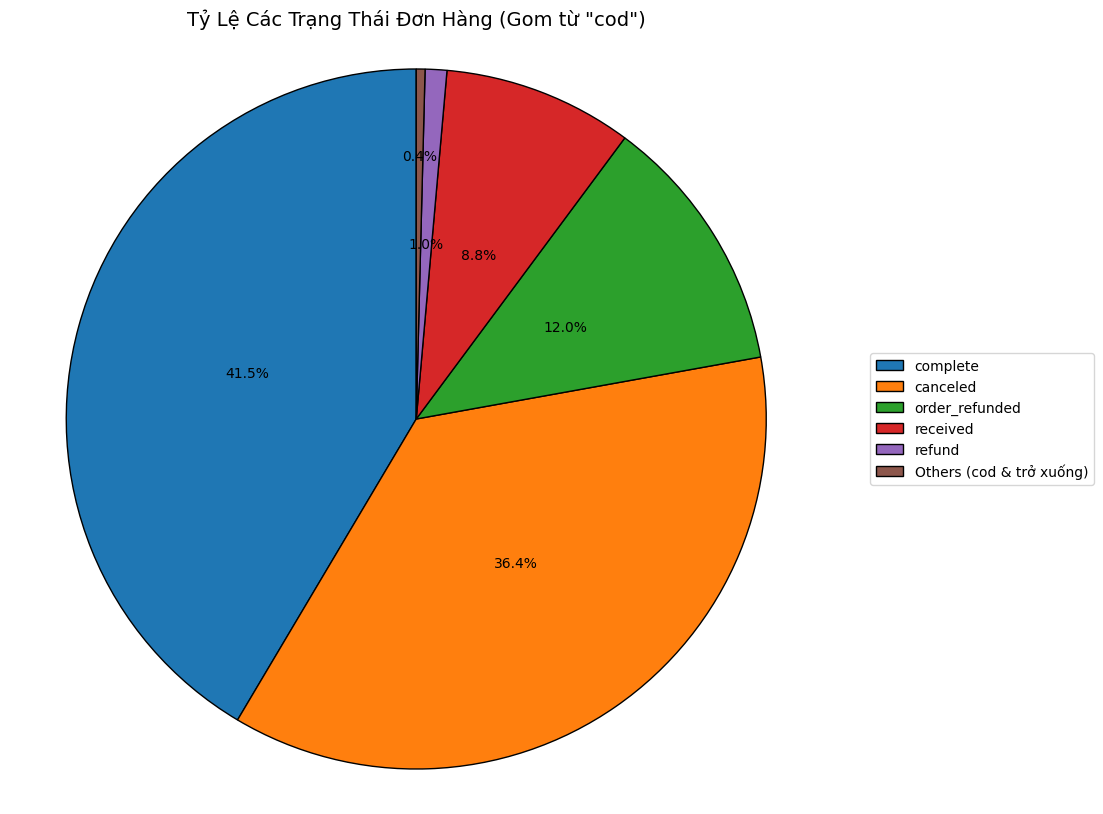


Các trạng thái đơn hàng duy nhất có trong dữ liệu của bạn (để bạn kiểm tra và cập nhật list bên dưới):
['complete', 'canceled', 'order_refunded', 'received', 'refund', 'cod', 'closed', 'paid', 'pending', 'payment_review', 'holded', 'processing', 'fraud', 'pending_paypal', 'exchange', 'Unknown']


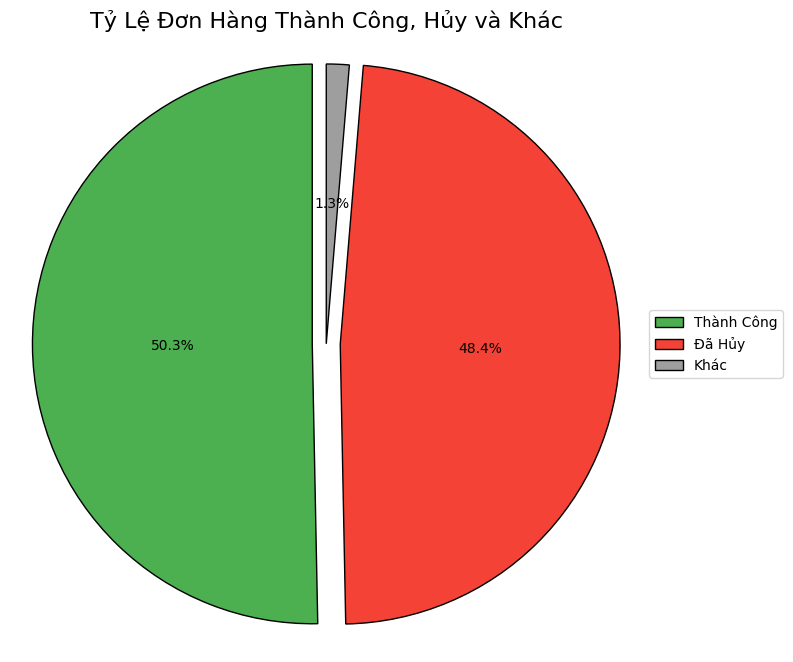


Phân tích chi tiết (dựa trên định nghĩa của bạn về 'thành công' và 'hủy'):
Tổng số đơn hàng duy nhất: 408749
Số đơn hàng được coi là 'Thành Công': 205651 (50.3%)
Số đơn hàng được coi là 'Đã Hủy': 197712 (48.4%)
Số đơn hàng 'Khác': 5386 (1.3%)


In [ ]:
# Kiểm tra sự tồn tại của các cột cần thiết
if 'increment_id' not in df.columns or 'status' not in df.columns:
    print("Lỗi: DataFrame phải chứa cột 'increment_id' và 'status' để thực hiện phân tích này.")
else:
    print("Đang phân tích trạng thái đơn hàng...")
    # --- Bước 1: Lấy trạng thái cho mỗi đơn hàng duy nhất ---
    order_statuses_df = df.drop_duplicates(subset=['increment_id'])[['increment_id', 'status']].copy()

    # Xử lý cột 'status'
    if pd.api.types.is_categorical_dtype(order_statuses_df['status']):
        if 'Unknown' not in order_statuses_df['status'].cat.categories:
            order_statuses_df['status'] = order_statuses_df['status'].cat.add_categories(['Unknown'])
        order_statuses_df['status'].fillna('Unknown', inplace=True)
    else:
        order_statuses_df['status'].fillna('Unknown', inplace=True)

    status_counts = order_statuses_df['status'].value_counts() # Sắp xếp theo tần suất giảm dần
    total_unique_orders = status_counts.sum()

    print(f"\nTổng số đơn hàng duy nhất được phân tích: {total_unique_orders}")
    print("Phân bổ các trạng thái đơn hàng (số lượng) - Sắp xếp theo tần suất giảm dần:")
    print(status_counts)

    # --- Bước 2: Chuẩn bị dữ liệu cho biểu đồ tròn tổng quan THEO YÊU CẦU MỚI ---
    status_to_group_from = 'cod' # Trạng thái bắt đầu gom nhóm
    label_for_others = f'Others ({status_to_group_from} & trở xuống)'
    fallback_others_label = 'Others (ít phổ biến)'


    if not status_counts.empty:
        if status_to_group_from in status_counts.index:
            status_list_for_indexing = status_counts.index.tolist()
            try:
                group_from_idx = status_list_for_indexing.index(status_to_group_from)
                statuses_to_keep = status_counts.iloc[:group_from_idx]
                statuses_to_group_sum = status_counts.iloc[group_from_idx:].sum()

                status_pie_data_list = []
                if not statuses_to_keep.empty:
                    status_pie_data_list.append(statuses_to_keep)

                if statuses_to_group_sum > 0:
                    status_pie_data_list.append(pd.Series({label_for_others: statuses_to_group_sum}))

                if status_pie_data_list:
                    status_pie_data = pd.concat(status_pie_data_list)
                    status_pie_data = status_pie_data[status_pie_data > 0]
                else:
                    status_pie_data = pd.Series({label_for_others: statuses_to_group_sum})
                    status_pie_data = status_pie_data[status_pie_data > 0]

            except ValueError:
                print(f"Lỗi: Trạng thái '{status_to_group_from}' không tìm thấy khi lấy index. Sử dụng logic N_TOP.")
                N_TOP_STATUSES = min(7, len(status_counts))
                top_statuses = status_counts.nlargest(N_TOP_STATUSES)
                other_count = status_counts.nsmallest(len(status_counts) - N_TOP_STATUSES).sum()
                if other_count > 0:
                    status_pie_data = pd.concat([top_statuses, pd.Series({fallback_others_label: other_count})])
                else:
                    status_pie_data = top_statuses
                label_for_others = fallback_others_label # Cập nhật label cho others
        else:
            print(f"Trạng thái '{status_to_group_from}' không tìm thấy trong danh sách. Sử dụng logic N_TOP_STATUSES để gom nhóm 'Others'.")
            N_TOP_STATUSES = min(7, len(status_counts))
            if len(status_counts) > N_TOP_STATUSES:
                top_statuses = status_counts.nlargest(N_TOP_STATUSES)
                other_count = status_counts.nsmallest(len(status_counts) - N_TOP_STATUSES).sum()
                if other_count > 0:
                    status_pie_data = pd.concat([top_statuses, pd.Series({fallback_others_label: other_count})])
                else:
                    status_pie_data = top_statuses
            else:
                status_pie_data = status_counts
            label_for_others = fallback_others_label # Cập nhật label cho others
    else:
        status_pie_data = pd.Series()

    # --- Bước 3: Vẽ biểu đồ tròn tổng quan (với dữ liệu đã gom nhóm mới) ---
    if not status_pie_data.empty:
        plt.figure(figsize=(13, 10))
        default_pct_distance = 0.5 # Khoảng cách mặc định cho tỷ lệ

        patches, texts, autotexts = plt.pie(
            status_pie_data,
            labels=None,
            autopct='%1.1f%%',
            startangle=90,
            wedgeprops={'edgecolor': 'black'},
            pctdistance=default_pct_distance # Áp dụng khoảng cách mặc định
        )
        plt.title('Tỷ Lệ Các Trạng Thái Đơn Hàng (Gom từ "cod")', fontsize=14)
        plt.axis('equal')

        # Tùy chỉnh vị trí tỷ lệ cho miếng "Others"
        # Tìm index của miếng "Others"
        others_slice_index = -1 # Mặc định không tìm thấy
        for i, label in enumerate(status_pie_data.index):
            if label_for_others in label: # Kiểm tra nếu nhãn chứa tên của "Others"
                others_slice_index = i
                break

        if others_slice_index != -1 and others_slice_index < len(autotexts):
            target_autotext = autotexts[others_slice_index]
            target_patch = patches[others_slice_index]

            # Tính toán vị trí mới cho tỷ lệ của "Others" với pctdistance = 0.75
            angle_rad = np.deg2rad((target_patch.theta1 + target_patch.theta2) / 2)
            desired_pct_distance_others = 0.75

            x_new = desired_pct_distance_others * np.cos(angle_rad)
            y_new = desired_pct_distance_others * np.sin(angle_rad)

            target_autotext.set_position((x_new, y_new))
            # Có thể cần điều chỉnh căn lề nếu text bị lệch
            # target_autotext.set_horizontalalignment('center')
            # target_autotext.set_verticalalignment('center')

        plt.legend(patches, status_pie_data.index, loc="center left", bbox_to_anchor=(1.05, 0, 0.5, 1), fontsize=10)
        plt.subplots_adjust(right=0.75)
        plt.show()
    else:
        print("Không có dữ liệu trạng thái để vẽ biểu đồ tròn tổng quan sau khi áp dụng logic gom nhóm mới.")

    # --- Bước 4: Tập trung vào "Thành công" và "Hủy" (phần này giữ nguyên logic) ---
    # (Giữ nguyên phần code này như trước, vì yêu cầu chỉ áp dụng cho biểu đồ tổng quan đầu tiên)
    print("\nCác trạng thái đơn hàng duy nhất có trong dữ liệu của bạn (để bạn kiểm tra và cập nhật list bên dưới):")
    print(list(status_counts.index))

    successful_statuses_list = ['complete', 'closed', 'received', 'delivered']
    canceled_statuses_list = ['canceled', 'fraud', 'order_refunded']

    count_successful = status_counts[status_counts.index.isin(successful_statuses_list)].sum()
    count_canceled = status_counts[status_counts.index.isin(canceled_statuses_list)].sum()
    count_others = total_unique_orders - count_successful - count_canceled

    if count_successful > 0 or count_canceled > 0 or count_others > 0:
        simple_labels_map = {
            'Thành Công': count_successful,
            'Đã Hủy': count_canceled,
            'Khác': count_others
        }

        final_labels_for_legend = [label for label, size in simple_labels_map.items() if size > 0]
        final_sizes = [size for size in simple_labels_map.values() if size > 0]

        available_colors = {'Thành Công': '#4CAF50', 'Đã Hủy': '#F44336', 'Khác': '#9E9E9E'}
        final_colors = []
        final_explode = []

        for label in final_labels_for_legend:
            if 'Thành Công' in label:
                final_colors.append(available_colors['Thành Công'])
                final_explode.append(0.05)
            elif 'Đã Hủy' in label:
                final_colors.append(available_colors['Đã Hủy'])
                final_explode.append(0.05)
            else: # Khác
                final_colors.append(available_colors['Khác'])
                final_explode.append(0)

        if final_sizes:
            plt.figure(figsize=(11, 8))
            patches_focused, texts_focused, autotexts_focused = plt.pie(
                final_sizes,
                labels=None,
                autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',
                startangle=90,
                colors=final_colors,
                explode=final_explode,
                wedgeprops={'edgecolor': 'black'},
                pctdistance=0.5 # Giữ nguyên hoặc thay đổi nếu muốn
            )
            plt.title('Tỷ Lệ Đơn Hàng Thành Công, Hủy và Khác', fontsize=16)
            plt.axis('equal')
            plt.legend(patches_focused, final_labels_for_legend, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=10)
            plt.subplots_adjust(right=0.7)
            plt.show()

            print(f"\nPhân tích chi tiết (dựa trên định nghĩa của bạn về 'thành công' và 'hủy'):")
            print(f"Tổng số đơn hàng duy nhất: {total_unique_orders}")
            print(f"Số đơn hàng được coi là 'Thành Công': {count_successful} ({count_successful/total_unique_orders*100:.1f}%)")
            print(f"Số đơn hàng được coi là 'Đã Hủy': {count_canceled} ({count_canceled/total_unique_orders*100:.1f}%)")
            print(f"Số đơn hàng 'Khác': {count_others} ({count_others/total_unique_orders*100:.1f}%)")
        else:
            print("Không có đủ dữ liệu sau khi nhóm 'Thành Công', 'Đã Hủy', 'Khác' để vẽ biểu đồ.")
    else:
        print("\nKhông thể tính toán số liệu cho 'Thành Công' hoặc 'Đã Hủy'. Vui lòng kiểm tra lại danh sách `successful_statuses_list` và `canceled_statuses_list` cho phù hợp với dữ liệu của bạn.")



 **Biểu đồ Tròn Tổng Quan Các Trạng Thái Đơn Hàng**

- **Thực trạng thị trường**:  
  Biểu đồ cho thấy `complete` (hoàn thành) và `canceled` (đã hủy) là hai trạng thái phổ biến nhất, phản ánh hai kết cục chính của các giao dịch thương mại điện tử (TMĐT) tại Pakistan trong tập dữ liệu này.

- **Các trạng thái cần quan tâm**:  
  Các trạng thái như `order_refunded` (đơn hàng đã hoàn tiền) và `received` (đã nhận) cũng là những trạng thái quan trọng, giúp hiểu rõ hơn về vòng đời của đơn hàng.

- **Nhóm "Others"**:  
  Tỷ lệ của nhóm này cho thấy phần trăm các đơn hàng đang ở các giai đoạn trung gian hoặc có tần suất thấp hơn trên toàn thị trường (hoặc trên nền tảng được lấy mẫu).

 **Biểu đồ Tròn Tập Trung "Thành Công", "Hủy", "Khác"**

- **Insight chính về thị trường**:  
  Tỷ lệ đơn hàng được phân loại là **"Đã Hủy"** (bao gồm `canceled`, `fraud`, `order_refunded`) ở mức **48.4%** là một con số rất đáng chú ý trên quy mô thị trường TMĐT Pakistan (theo mẫu dữ liệu này). Nó gần như ngang bằng với tỷ lệ đơn hàng **"Thành Công"** là **50.3%**.

- **Đặc điểm thị trường**:  
  Tỷ lệ hủy và hoàn tiền cao có thể là một đặc điểm của thị trường TMĐT đang phát triển như Pakistan, nơi các yếu tố sau có thể góp phần vào tỷ lệ này:  
  - Sự phổ biến của phương thức thanh toán **COD (Cash on Delivery)**, cho phép khách hàng thay đổi quyết định dễ dàng hơn khi nhận hàng.  
  - Thói quen mua sắm (ví dụ: đặt nhiều đơn rồi chọn một).  
  - Các vấn đề về **logistics**, chất lượng sản phẩm từ nhiều nhà cung cấp khác nhau.  
  - Chính sách đổi trả/hoàn tiền của các sàn hoặc nhà bán lẻ.  
  - Mức độ tin cậy vào mua sắm trực tuyến.  

- **Tỷ lệ "Khác" (1.3%)**:  
  Cho thấy hầu hết các đơn hàng trong mẫu dữ liệu này đã có trạng thái cuối cùng tương đối rõ ràng.

## **5.Mô Hình Dự Báo Doanh Số**

Bước 1: Chuẩn bị Dữ liệu cho Chuỗi Thời gian (Sử dụng grand_total và lọc status)

Đọc dữ liệu: Tải file cleaned_Pakistan Largest Ecommerce Dataset.csv vào DataFrame.

Kiểm tra cột: Đảm bảo các cột 'status', 'increment_id', 'created_at' (hoặc 'working_date'), và 'grand_total' tồn tại và có tên chính xác.

Lọc theo status: Chỉ giữ lại các dòng có status là 'complete' hoặc 'received'.

Lấy grand_total duy nhất cho mỗi đơn hàng: Vì grand_total là tổng của đơn hàng, chúng ta cần loại bỏ các dòng trùng lặp theo increment_id để mỗi đơn hàng chỉ được tính một lần.

Chuyển đổi cột ngày tháng: Đảm bảo cột ngày tháng (ví dụ: 'created_at') được chuyển sang kiểu datetime.

Đặt làm chỉ mục (Index): Đặt cột ngày tháng làm chỉ mục.

Tổng hợp grand_total hàng tháng: Tính tổng grand_total của các đơn hàng thành công theo tháng.

Xử lý giá trị thiếu (nếu có):

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --- Bắt đầu xử lý cho mô hình dự báo doanh số ---

# Xác định cột ngày tháng và cột giá trị sẽ sử dụng
date_column_for_ts = None
value_column_for_ts = 'grand_total' # Giả định cột giá trị là 'grand_total'

# Kiểm tra và chọn cột ngày tháng
if 'created_at' in df.columns:
    date_column_for_ts = 'created_at'
elif 'created_at ' in df.columns: # Kiểm tra trường hợp có dấu cách ở cuối
    date_column_for_ts = 'created_at '
    print("Lưu ý: Sử dụng cột 'created_at ' (có dấu cách ở cuối) làm cột ngày tháng.")
    # Bạn có thể đổi tên cột này để dễ sử dụng hơn:
    # df.rename(columns={'created_at ': 'created_at'}, inplace=True)
    # date_column_for_ts = 'created_at'
elif 'working_date' in df.columns:
    date_column_for_ts = 'working_date'
else:
    print("LỖI: Không tìm thấy cột ngày tháng phù hợp ('created_at', 'created_at ', hoặc 'working_date').")
    # Khởi tạo monthly_sales rỗng để các cell sau không báo lỗi biến chưa định nghĩa
    monthly_sales = pd.Series(dtype='float64')

# Các cột cần thiết cơ bản (sẽ cập nhật cột ngày tháng sau)
required_base_cols = ['status', 'increment_id', value_column_for_ts]
required_cols_step1 = []

if date_column_for_ts: # Nếu đã tìm thấy cột ngày tháng
    required_cols_step1 = required_base_cols + [date_column_for_ts]
    missing_for_step1 = [col for col in required_cols_step1 if col not in df.columns]
else: # Nếu không tìm thấy cột ngày tháng ở trên
    missing_for_step1 = ["cột ngày tháng ('created_at' hoặc 'working_date')"] + \
                        [col for col in required_base_cols if col not in df.columns]

if missing_for_step1 and not (len(missing_for_step1) == 1 and "cột ngày tháng" in missing_for_step1[0] and date_column_for_ts is None) :
    # In lỗi nếu thiếu các cột cơ bản, hoặc thiếu cột ngày tháng và date_column_for_ts đã được xác định (nghĩa là tên cột ngày tháng trong required_cols_step1 sai)
    actual_missing = [col for col in required_cols_step1 if col not in df.columns] # Kiểm tra lại các cột thực sự thiếu
    if actual_missing:
        print(f"LỖI: Thiếu các cột cần thiết cho Bước 1: {actual_missing}")
    monthly_sales = pd.Series(dtype='float64')
elif date_column_for_ts is None: # Đã in lỗi không tìm thấy cột ngày tháng ở trên
    pass # monthly_sales đã được khởi tạo rỗng
else:
    print(f"Sử dụng cột '{date_column_for_ts}' cho ngày tháng và '{value_column_for_ts}' cho doanh số.")

    # Tạo bản sao để thao tác
    df_forecast_prep = df.copy()

    # Chuyển đổi cột ngày tháng sang datetime (nếu chưa phải)
    if not pd.api.types.is_datetime64_any_dtype(df_forecast_prep[date_column_for_ts]):
        print(f"Đang cố gắng chuyển đổi cột '{date_column_for_ts}' sang datetime...")
        df_forecast_prep[date_column_for_ts] = pd.to_datetime(df_forecast_prep[date_column_for_ts], errors='coerce')

    # Chuyển đổi cột giá trị sang kiểu số (nếu chưa phải)
    if not pd.api.types.is_numeric_dtype(df_forecast_prep[value_column_for_ts]):
         print(f"Đang cố gắng chuyển đổi cột '{value_column_for_ts}' sang kiểu số...")
         df_forecast_prep[value_column_for_ts] = pd.to_numeric(df_forecast_prep[value_column_for_ts], errors='coerce')


    # 1. Lọc theo status 'complete' và 'received'
    successful_statuses = ['complete', 'received']
    df_successful = df_forecast_prep[df_forecast_prep['status'].isin(successful_statuses)]
    print(f"\nSố dòng sau khi lọc theo status {successful_statuses}: {len(df_successful)}")

    if not df_successful.empty:
        # 2. Lấy grand_total duy nhất cho mỗi đơn hàng thành công
        # Chọn các cột cần thiết trước khi drop_duplicates
        cols_to_keep = [date_column_for_ts, 'increment_id', value_column_for_ts]
        # Thêm 'discount_percentage' nếu bạn muốn tổng hợp nó làm biến ngoại sinh
        # if 'discount_percentage' in df_successful.columns:
        #     cols_to_keep.append('discount_percentage')

        df_unique_orders = df_successful[cols_to_keep].drop_duplicates(subset=['increment_id'], keep='first')
        print(f"Số đơn hàng thành công duy nhất: {len(df_unique_orders)}")

        # 3. Loại bỏ các dòng có ngày tháng hoặc giá trị là NaT/NaN sau các bước trên
        df_unique_orders.dropna(subset=[date_column_for_ts, value_column_for_ts], inplace=True)
        print(f"Số đơn hàng thành công duy nhất sau khi loại bỏ NaN ở cột ngày/giá trị: {len(df_unique_orders)}")

        if not df_unique_orders.empty:
            # 4. Đặt cột ngày tháng làm index
            df_ts = df_unique_orders.set_index(date_column_for_ts)

            # 5. Tổng hợp grand_total hàng tháng ('M')
            monthly_sales = df_ts[value_column_for_ts].resample('M').sum()


            monthly_sales = monthly_sales.fillna(0)

            print("\nDoanh thu hàng tháng (từ grand_total của đơn hàng thành công, 5 dòng đầu):")
            print(monthly_sales.head())
            print(f"\nSố lượng tháng có dữ liệu: {len(monthly_sales)}")

            if len(monthly_sales) < 12:
                print("\nCẢNH BÁO: Dữ liệu chuỗi thời gian quá ngắn để xây dựng mô hình dự báo đáng tin cậy.")
                print("Thông thường cần ít nhất 2-3 chu kỳ mùa vụ (ví dụ 2-3 năm dữ liệu hàng tháng).")
        else:
            print("DataFrame rỗng sau khi xử lý đơn hàng duy nhất và loại bỏ NaN.")
            monthly_sales = pd.Series(dtype='float64')
    else:
        print("Không có đơn hàng nào với status 'complete' hoặc 'received'.")
        monthly_sales = pd.Series(dtype='float64')

# Bây giờ, `monthly_sales` đã sẵn sàng cho Bước 2: Time Series EDA và các bước tiếp theo.
# Nếu bạn có `monthly_avg_discount`, bạn có thể dùng nó làm biến ngoại sinh cho SARIMAX hoặc Prophet.

Sử dụng cột 'created_at' cho ngày tháng và 'grand_total' cho doanh số.

Số dòng sau khi lọc theo status ['complete', 'received']: 310993
Số đơn hàng thành công duy nhất: 205320
Số đơn hàng thành công duy nhất sau khi loại bỏ NaN ở cột ngày/giá trị: 205320

Doanh thu hàng tháng (từ grand_total của đơn hàng thành công, 5 dòng đầu):
created_at
2016-07-31    79014444
2016-08-31    29556441
2016-09-30    65358522
2016-10-31    23654037
2016-11-30    88454756
Freq: ME, Name: grand_total, dtype: int64

Số lượng tháng có dữ liệu: 26


bước 2: Phân tích Khám phá Dữ liệu Chuỗi Thời gian (Time Series EDA)

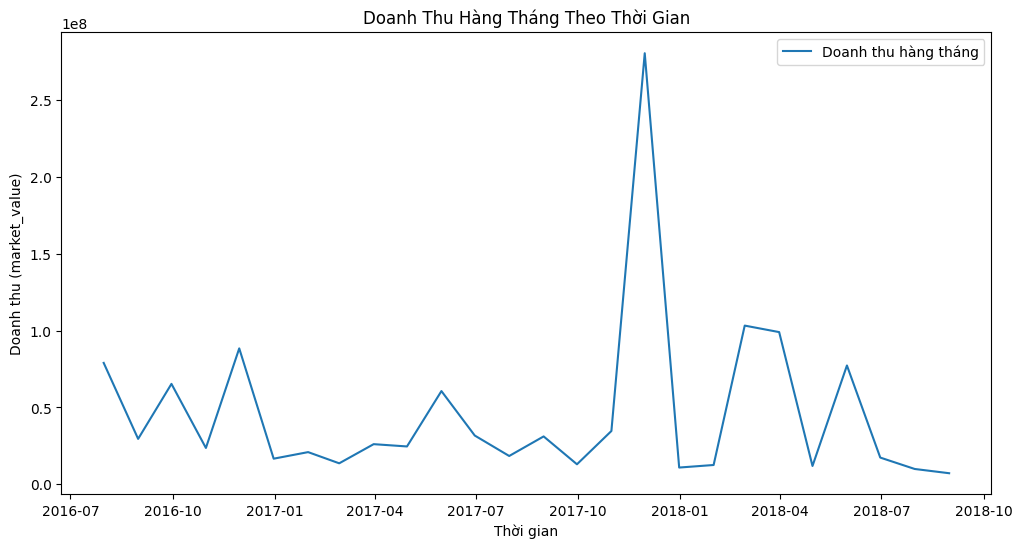


--- Phân rã chuỗi thời gian ---


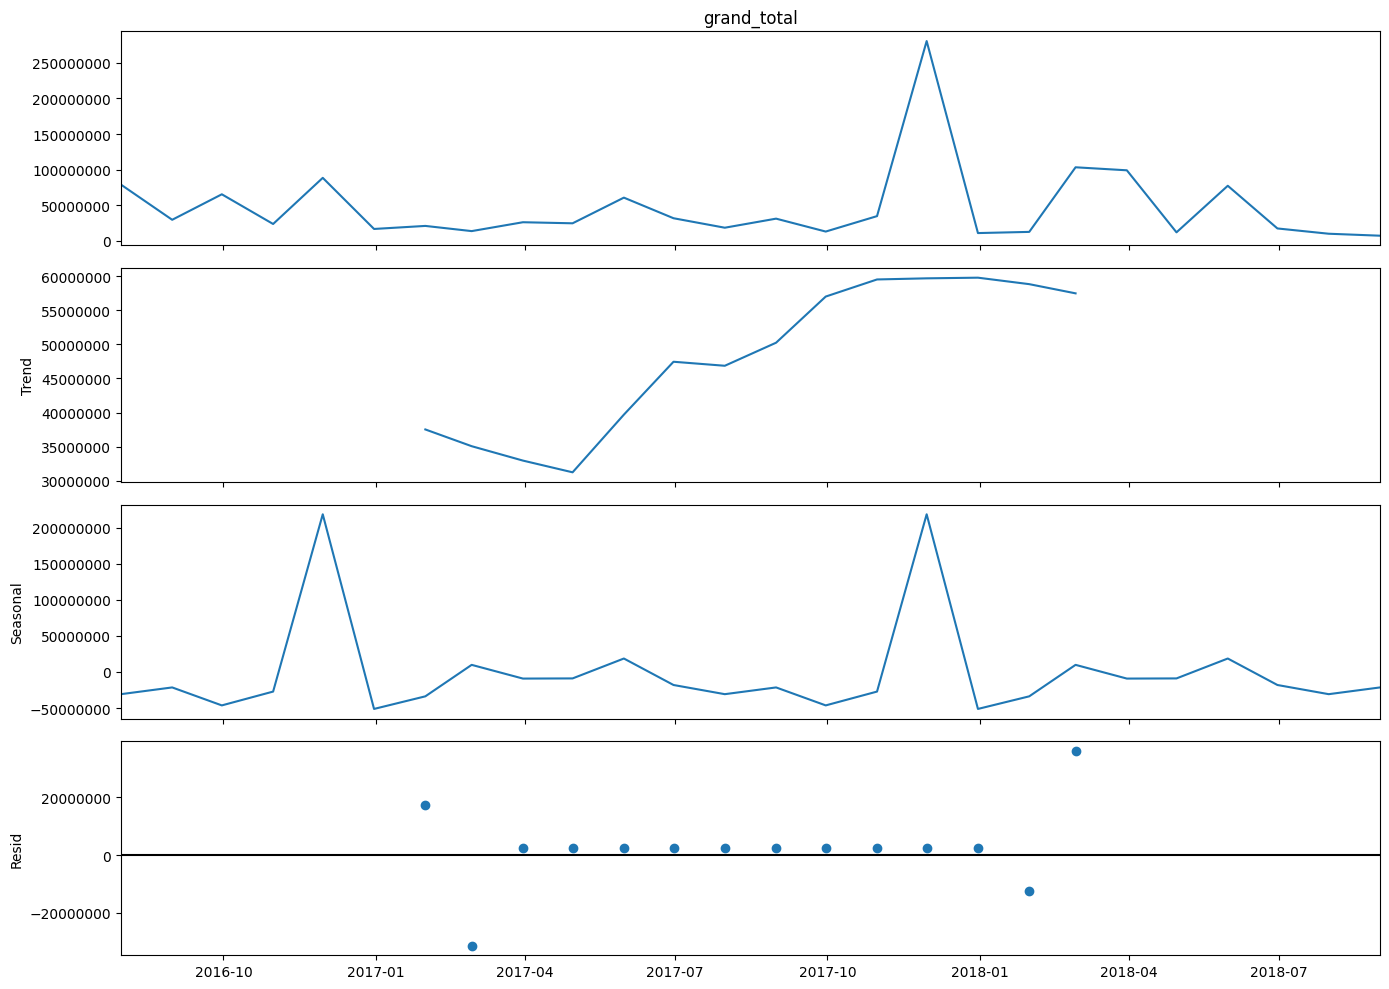


--- Kiểm tra tính dừng (ADF Test) ---
Kết quả kiểm định Dickey-Fuller tăng cường cho Doanh thu hàng tháng ban đầu:
Test Statistic                -5
p-value                        0
#Lags Used                     0
Number of Observations Used   25
Critical Value (1%)           -4
Critical Value (5%)           -3
Critical Value (10%)          -3
dtype: float64
=> Dữ liệu có tính dừng (bác bỏ giả thuyết H0)

--- Biểu đồ Tự tương quan (ACF) và Tự tương quan riêng phần (PACF) ---


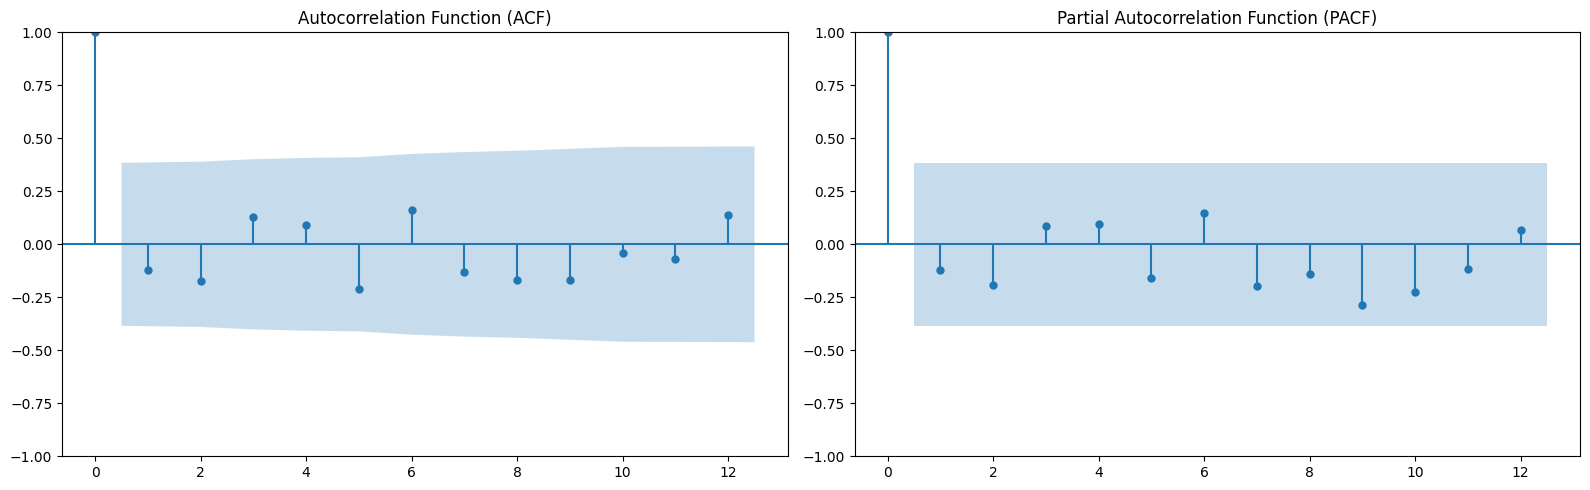

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller # Import thêm cho ADF test
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Import thêm cho ACF/PACF
from matplotlib.ticker import ScalarFormatter # Import thêm


if len(monthly_sales) >= 12: # Chỉ thực hiện nếu có đủ dữ liệu
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_sales, label='Doanh thu hàng tháng')
    plt.title('Doanh Thu Hàng Tháng Theo Thời Gian')
    plt.xlabel('Thời gian')
    plt.ylabel('Doanh thu (market_value)')
    plt.legend()
    plt.show()


# Giả sử bạn đã có monthly_sales từ Bước 1
# Ví dụ tạo lại monthly_sales nếu bạn chưa có sẵn:
if 'monthly_sales' not in locals() or monthly_sales.empty:
    print("Biến 'monthly_sales' không tồn tại hoặc rỗng. Tạo dữ liệu mẫu...")
    # Đảm bảo có đủ dữ liệu cho period=12 trong seasonal_decompose và lags trong ACF/PACF
    dates_sample = pd.date_range(start='2016-01-01', periods=36, freq='M')
    sales_sample = np.abs(np.random.normal(loc=5e7, scale=2e7, size=36) + \
                          np.arange(36) * 1e6 + \
                          np.sin(np.arange(36) * np.pi/6) * 1e7 + \
                          np.cos(np.arange(36) * np.pi/3) * 5e6) # Thêm biến động
    monthly_sales = pd.Series(sales_sample, index=dates_sample)
    monthly_sales.name = 'grand_total' # Đặt tên cho Series để nhãn biểu đồ gốc đẹp hơn
    print("Đã sử dụng dữ liệu monthly_sales mẫu.")

# --- Bắt đầu Bước 2: Phân tích Khám phá Dữ liệu Chuỗi Thời gian (Time Series EDA) ---

if len(monthly_sales) >= 24: # Cần ít nhất 2 chu kỳ cho seasonal_decompose với period=12
    print("\n--- Phân rã chuỗi thời gian ---")
    decomposition = seasonal_decompose(monthly_sales, model='additive', period=12)
    fig_decomposition = decomposition.plot() # Đổi tên biến để tránh xung đột
    fig_decomposition.set_size_inches(14, 10)

    # --- Bắt đầu phần định dạng trục Y cho biểu đồ phân rã ---
    axes_decomposition = fig_decomposition.axes
    if len(axes_decomposition) >= 4: # Đảm bảo có đủ 4 subplots
        # Định dạng cho trục Y của biểu đồ Observed (ax[0])
        ax_observed = axes_decomposition[0]
        ax_observed.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
        ax_observed.ticklabel_format(style='plain', axis='y')

        # Định dạng cho trục Y của biểu đồ Trend (ax[1])
        ax_trend = axes_decomposition[1]
        ax_trend.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
        ax_trend.ticklabel_format(style='plain', axis='y')

        # (Tùy chọn) Định dạng cho trục Y của biểu đồ Seasonal (ax[2])
        ax_seasonal = axes_decomposition[2]
        ax_seasonal.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
        ax_seasonal.ticklabel_format(style='plain', axis='y')

        # (Tùy chọn) Định dạng cho trục Y của biểu đồ Resid (ax[3])
        ax_resid = axes_decomposition[3]
        ax_resid.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
        ax_resid.ticklabel_format(style='plain', axis='y')

    plt.tight_layout()
    plt.show()

    # --- Kiểm tra tính dừng bằng ADF test ---
    print("\n--- Kiểm tra tính dừng (ADF Test) ---")
    def adf_test(series, series_name=""):
        print(f'Kết quả kiểm định Dickey-Fuller tăng cường cho {series_name}:')
        # Loại bỏ NaN trước khi kiểm tra nếu có
        dftest = adfuller(series.dropna(), autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)
        if dftest[1] <= 0.05:
            print("=> Dữ liệu có tính dừng (bác bỏ giả thuyết H0)")
        else:
            print("=> Dữ liệu không có tính dừng (không bác bỏ giả thuyết H0)")

    adf_test(monthly_sales, "Doanh thu hàng tháng ban đầu")


    monthly_sales_stationary = monthly_sales.copy() # Tạm thời dùng dữ liệu gốc, bạn cần điều chỉnh nếu nó không dừng

    # --- Vẽ ACF và PACF ---
    # Đảm bảo chuỗi không rỗng và có đủ điểm dữ liệu cho lags
    if not monthly_sales_stationary.dropna().empty and len(monthly_sales_stationary.dropna()) > 1:
        print("\n--- Biểu đồ Tự tương quan (ACF) và Tự tương quan riêng phần (PACF) ---")
        fig_acf_pacf, axes_acf_pacf = plt.subplots(1, 2, figsize=(16, 5))

        # Tính số lags tối đa, không vượt quá một nửa độ dài chuỗi trừ 1
        # và không gây lỗi nếu chuỗi quá ngắn
        n_obs_stationary = len(monthly_sales_stationary.dropna())
        max_lags = min(20, n_obs_stationary // 2 - 1)

        if max_lags > 0:
            plot_acf(monthly_sales_stationary.dropna(), ax=axes_acf_pacf[0], lags=max_lags)
            axes_acf_pacf[0].set_title('Autocorrelation Function (ACF)')

            plot_pacf(monthly_sales_stationary.dropna(), ax=axes_acf_pacf[1], lags=max_lags)
            axes_acf_pacf[1].set_title('Partial Autocorrelation Function (PACF)')

            plt.tight_layout()
            plt.show()
        else:
            print("Không đủ dữ liệu trong chuỗi đã dừng để tính toán lags hợp lệ cho ACF/PACF.")
            print("(Cần ít nhất 4 điểm dữ liệu không rỗng để có lags > 0).")
    else:
        print("Chuỗi dữ liệu đã dừng (monthly_sales_stationary) rỗng hoặc quá ngắn để vẽ ACF/PACF.")

else:
    print("Không đủ dữ liệu để thực hiện phân rã mùa vụ đáng tin cậy (cần ít nhất 24 tháng).")
    # Nếu muốn vẽ biểu đồ gốc của monthly_sales dù không phân rã được:
    if 'monthly_sales' in locals() and not monthly_sales.empty:
        plt.figure(figsize=(14, 3))
        monthly_sales.plot()
        plt.title('Doanh thu hàng tháng (grand_total)')
        ax_current = plt.gca()
        ax_current.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
        ax_current.ticklabel_format(style='plain', axis='y')
        plt.grid(True)
        plt.show()

        # Bạn vẫn có thể chạy ADF test cho monthly_sales gốc
        print("\n--- Kiểm tra tính dừng (ADF Test) cho dữ liệu gốc (nếu không phân rã được) ---")
        def adf_test_short(series, series_name=""): # Định nghĩa lại nếu cần
            print(f'Kết quả kiểm định Dickey-Fuller tăng cường cho {series_name}:')
            dftest = adfuller(series.dropna(), autolag='AIC')
            dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
            for key,value in dftest[4].items():
                dfoutput['Critical Value (%s)'%key] = value
            print(dfoutput)
            if dftest[1] <= 0.05:
                print("=> Dữ liệu có tính dừng (bác bỏ giả thuyết H0)")
            else:
                print("=> Dữ liệu không có tính dừng (không bác bỏ giả thuyết H0)")
        adf_test_short(monthly_sales, "Doanh thu hàng tháng ban đầu")


Bước 3: Lựa chọn và Huấn luyện Mô hình

In [ ]:
# --- Bước 3: Lựa chọn và Huấn luyện Mô hình ---


train_data = pd.Series(dtype='float64')
test_data = pd.Series(dtype='float64')
predictions_sarima = pd.Series(dtype='float64') # Sẽ lưu kết quả dự báo của SARIMA
model_sarima_fitted = None # Để lưu mô hình đã huấn luyện



p, d, q = 1, 0, 0  # Gợi ý từ PACF cắt ở lag 1, ACF giảm dần, dữ liệu dừng
P, D, Q, m = 1, 0, 0, 12 # VÍ DỤ: Giả sử có AR mùa vụ bậc 1, không sai phân mùa vụ

# Kiểm tra xem có đủ dữ liệu để huấn luyện không
if 'monthly_sales' in locals() and not monthly_sales.empty and len(monthly_sales) >= 24:
    # Chia dữ liệu train/test
    train_size = int(len(monthly_sales) * 0.8)

    # Đảm bảo tập train và test có đủ số lượng mẫu tối thiểu
    # Ví dụ: tập train ít nhất bằng chu kỳ mùa vụ + số tham số, tập test ít nhất 1 điểm
    if train_size >= m + (p+q+P+Q) and (len(monthly_sales) - train_size) >= 1:
        train_data, test_data = monthly_sales[0:train_size], monthly_sales[train_size:len(monthly_sales)]

        print(f"Kích thước tập Train: {len(train_data)}")
        print(f"Kích thước tập Test: {len(test_data)}")

        # --- Huấn luyện mô hình SARIMA ---
        try:
            print(f"\nĐang huấn luyện mô hình SARIMA({p},{d},{q})({P},{D},{Q},{m})...")

            # Sử dụng lớp ARIMA từ statsmodels.tsa.arima.model
            # Tham số seasonal_order=(P,D,Q,m) được dùng để chỉ định thành phần mùa vụ
            model_sarima = ARIMA(train_data,
                                 order=(p,d,q),
                                 seasonal_order=(P,D,Q,m),
                                 enforce_stationarity=False, # Đặt False nếu d hoặc D > 0
                                 enforce_invertibility=False) # Đặt False để linh hoạt hơn

            model_sarima_fitted = model_sarima.fit()
            print(model_sarima_fitted.summary())

            # Dự báo trên tập test
            # Sử dụng .forecast() cho dự báo out-of-sample
            predictions_sarima = model_sarima_fitted.forecast(steps=len(test_data))
            # Đảm bảo index của predictions khớp với test_data để dễ so sánh và vẽ biểu đồ
            if not test_data.empty:
                 predictions_sarima.index = test_data.index

        except Exception as e:
            print(f"Lỗi khi huấn luyện hoặc dự báo với SARIMA: {e}")
            print("Thử lại với mô hình ARIMA đơn giản hơn hoặc kiểm tra tham số.")
            # Fallback: Nếu SARIMA lỗi, có thể thử ARIMA đơn giản (p,d,q)
            try:
                print(f"\nThử huấn luyện mô hình ARIMA({p},{d},{q}) đơn giản...")
                model_arima_simple = ARIMA(train_data, order=(p,d,q))
                model_arima_simple_fitted = model_arima_simple.fit()
                print(model_arima_simple_fitted.summary())
                predictions_arima = model_arima_simple_fitted.forecast(steps=len(test_data))
                if not test_data.empty:
                    predictions_arima.index = test_data.index

                predictions_sarima = predictions_arima
                model_sarima_fitted = model_arima_simple_fitted # Lưu mô hình này
                print("Đã sử dụng mô hình ARIMA đơn giản do SARIMA gặp lỗi.")
            except Exception as e_simple:
                print(f"Lỗi khi huấn luyện ARIMA đơn giản: {e_simple}")


    else:
        print("Không đủ dữ liệu để chia train/test một cách có ý nghĩa cho SARIMA.")
        print("Toàn bộ dữ liệu sẽ được dùng để huấn luyện (nếu đủ) cho dự báo tương lai, nhưng không thể đánh giá trên tập test.")
        train_data = monthly_sales.copy()

        if len(train_data) >= m + (p+q+P+Q):
            try:
                print(f"\nĐang huấn luyện mô hình SARIMA({p},{d},{q})({P},{D},{Q},{m}) trên toàn bộ dữ liệu...")
                model_sarima = ARIMA(train_data, order=(p,d,q), seasonal_order=(P,D,Q,m),
                                     enforce_stationarity=False, enforce_invertibility=False)
                model_sarima_fitted = model_sarima.fit()
                print(model_sarima_fitted.summary())
                print("Mô hình đã được huấn luyện trên toàn bộ dữ liệu. Sẵn sàng cho dự báo tương lai.")
            except Exception as e:
                print(f"Lỗi khi huấn luyện SARIMA trên toàn bộ dữ liệu: {e}")
        else:
            print(f"Dữ liệu quá ngắn ({len(train_data)} điểm) ngay cả khi dùng toàn bộ cho order SARIMA đã chọn.")



else:
    print("Không đủ dữ liệu 'monthly_sales' (< 24 tháng) để chia train/test và huấn luyện mô hình SARIMA một cách đáng tin cậy.")



Kích thước tập Train: 20
Kích thước tập Test: 6

Đang huấn luyện mô hình SARIMA(1,0,0)(1,0,0,12)...
                                    SARIMAX Results                                     
Dep. Variable:                      grand_total   No. Observations:                   20
Model:             ARIMA(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                -138.097
Date:                          Fri, 16 May 2025   AIC                            284.193
Time:                                  17:53:18   BIC                            283.977
Sample:                              07-31-2016   HQIC                           281.519
                                   - 02-28-2018                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.926e+07   1.18e-

Bước 4: Đánh giá Mô hình


--- Bước 4: Đánh giá Mô hình ---

Đánh giá mô hình SARIMA(1,0,0)(1,0,0,12):
RMSE: 31469446.99
MAE: 18691652.32
MAPE: 69.00%


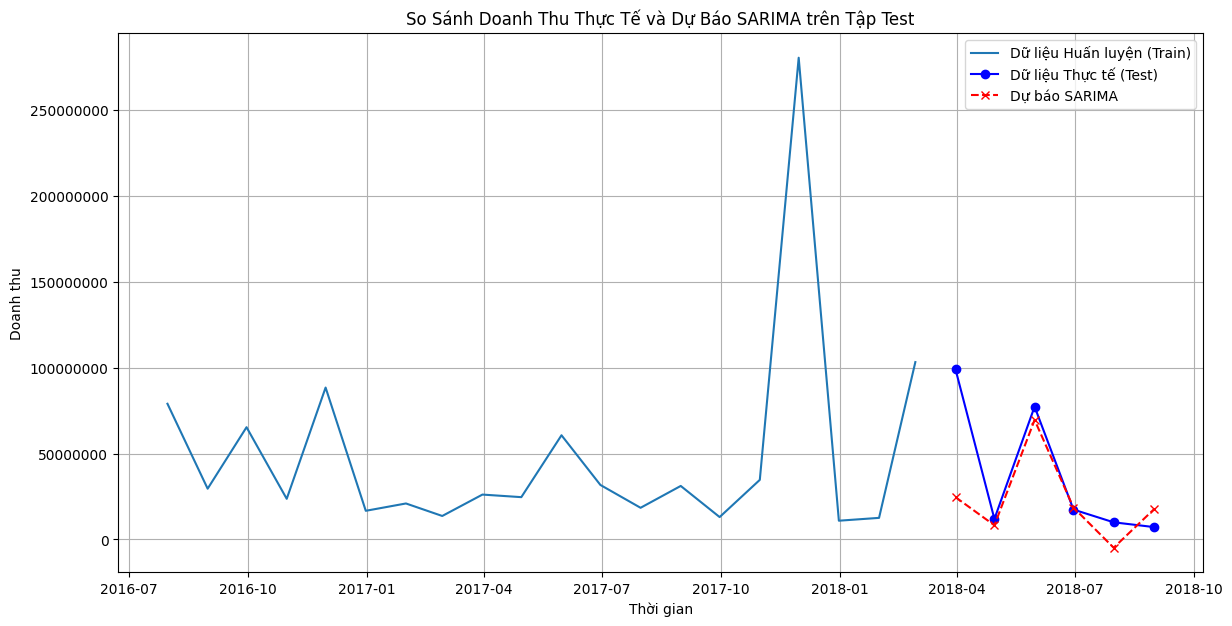

In [ ]:

from matplotlib.ticker import ScalarFormatter # Thêm import này

# --- Bước 4: Đánh giá Mô hình ---
print("\n--- Bước 4: Đánh giá Mô hình ---")
if not test_data.empty and not predictions_sarima.empty and len(test_data) == len(predictions_sarima):
    try:
        rmse_sarima = np.sqrt(mean_squared_error(test_data, predictions_sarima))
        mae_sarima = mean_absolute_error(test_data, predictions_sarima)

        # Tính MAPE, cẩn thận với giá trị 0 trong test_data để tránh lỗi chia cho 0
        # Thay thế giá trị 0 trong test_data bằng một số rất nhỏ (ví dụ: 1e-6) trước khi chia
        test_data_for_mape = test_data.replace(0, 1e-6)
        mape_sarima = np.mean(np.abs((test_data - predictions_sarima) / test_data_for_mape)) * 100

        print(f'\nĐánh giá mô hình SARIMA({p},{d},{q})({P},{D},{Q},{m}):') # Nhớ cập nhật p,d,q,P,D,Q,m nếu bạn thay đổi
        print(f'RMSE: {rmse_sarima:.2f}')
        print(f'MAE: {mae_sarima:.2f}')
        print(f'MAPE: {mape_sarima:.2f}%')

        # Trực quan hóa dự báo so với thực tế trên tập test
        plt.figure(figsize=(14, 7))
        plt.plot(train_data.index, train_data, label='Dữ liệu Huấn luyện (Train)')
        plt.plot(test_data.index, test_data, label='Dữ liệu Thực tế (Test)', color='blue', marker='o')
        plt.plot(predictions_sarima.index, predictions_sarima, label=f'Dự báo SARIMA', color='red', linestyle='--', marker='x')

        plt.title('So Sánh Doanh Thu Thực Tế và Dự Báo SARIMA trên Tập Test')
        plt.xlabel('Thời gian')
        plt.ylabel('Doanh thu')

        # --- THAY ĐỔI ĐỂ ĐỊNH DẠNG TRỤC Y ---
        ax = plt.gca() # Lấy đối tượng trục hiện tại
        ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False)) # Sử dụng ScalarFormatter
        ax.ticklabel_format(style='plain', axis='y') # Buộc hiển thị số đầy đủ cho trục Y
        # Bạn có thể chỉ cần một trong hai dòng trên, ticklabel_format thường là đủ.
        # Nếu giá trị quá lớn và gây chồng chéo, có thể cần tùy chỉnh thêm (ví dụ: xoay nhãn, giảm số lượng tick)
        # --- KẾT THÚC THAY ĐỔI ---

        plt.legend()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"Lỗi khi đánh giá mô hình SARIMA: {e}")

elif not test_data.empty and not predictions_sarima.empty and len(test_data) != len(predictions_sarima):
    print("\nLỗi: Độ dài của test_data và predictions_sarima không khớp. Không thể đánh giá.")
    print(f"Độ dài test_data: {len(test_data)}, Độ dài predictions_sarima: {len(predictions_sarima)}")
else:
    print("\nKhông có đủ dữ liệu test hoặc dự báo để đánh giá (có thể do dữ liệu quá ngắn hoặc lỗi huấn luyện).")

Bước 5: Thực hiện Dự báo cho Tương Lai



--- Bước 5: Thực hiện Dự báo cho Tương Lai ---

Đang huấn luyện lại mô hình SARIMA trên toàn bộ dữ liệu lịch sử để dự báo tương lai...
Sử dụng tham số: order=(1, 0, 0), seasonal_order=(1, 0, 0, 12)
Đã huấn luyện lại mô hình trên toàn bộ dữ liệu.

Thực hiện dự báo cho 12 tháng tới...

Dự báo doanh thu cho 12 tháng tới (SARIMA (1, 0, 0)(1, 0, 0, 12)):
2018-09-30   -19523851
2018-10-31    23470567
2018-11-30   488863883
2018-12-31   -20817318
2019-01-31   -17650841
2019-02-28   153897669
2019-03-31   145898569
2019-04-30   -18834008
2019-05-31   104826262
2019-06-30    -8502103
2019-07-31   -22524966
2019-08-31   -27751766
Freq: ME, Name: predicted_mean, dtype: float64

Khoảng tin cậy cho dự báo:
            lower grand_total  upper grand_total
2018-09-30         -128286854           89239152
2018-10-31          -89160584          136101717
2018-11-30          375957843          601769923
2018-12-31         -133743233           92108596
2019-01-31         -130578194           95276513
2

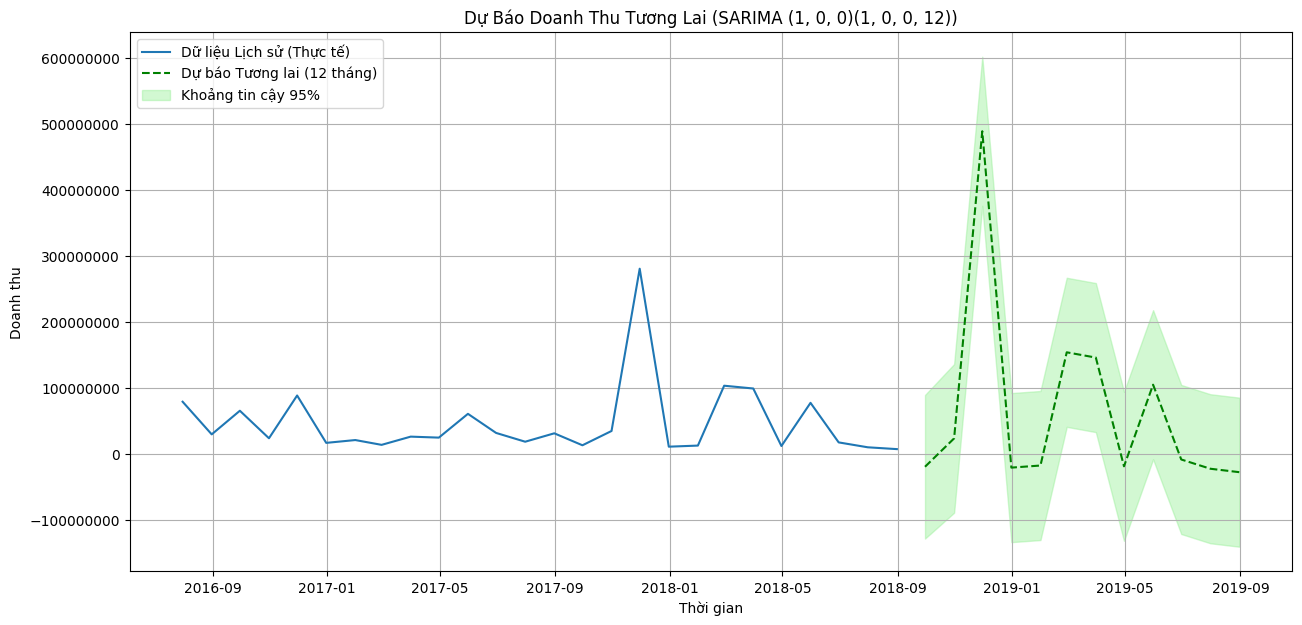


--- Kết thúc Bước 5 ---


In [ ]:
# Giả định các biến p, d, q, P, D, Q, m, model_sarima_fitted, monthly_sales, test_data
# đã tồn tại từ các bước trước.
# Và các thư viện cần thiết như pandas, matplotlib.pyplot, ARIMA đã được import.
# import pandas as pd # Đã có ở trên
# import matplotlib.pyplot as plt # Đã có ở trên
# from statsmodels.tsa.arima.model import ARIMA # Đã có ở trên
from matplotlib.ticker import ScalarFormatter # Thêm import này nếu chưa có ở đầu file

# --- Bước 5: Thực hiện Dự báo cho Tương Lai ---
print("\n\n--- Bước 5: Thực hiện Dự báo cho Tương Lai ---")

# Biến để lưu mô hình cuối cùng sẽ được dùng để dự báo tương lai
model_for_future_forecasts = None
final_order_params = (p,d,q) # Giả sử p,d,q là các biến đã định nghĩa
final_seasonal_order_params = (P,D,Q,m) # Giả sử P,D,Q,m là các biến đã định nghĩa

if model_sarima_fitted is not None:
    # Kiểm tra xem model_sarima_fitted đã được huấn luyện trên toàn bộ dữ liệu hay chỉ trên train_data
    if not test_data.empty: # Nghĩa là model_sarima_fitted đã được huấn luyện trên train_data
        print("\nĐang huấn luyện lại mô hình SARIMA trên toàn bộ dữ liệu lịch sử để dự báo tương lai...")
        print(f"Sử dụng tham số: order={final_order_params}, seasonal_order={final_seasonal_order_params}")
        try:
            model_refit_full_data = ARIMA(monthly_sales,
                                          order=final_order_params,
                                          seasonal_order=final_seasonal_order_params,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
            model_for_future_forecasts = model_refit_full_data.fit()
            print("Đã huấn luyện lại mô hình trên toàn bộ dữ liệu.")
            # print(model_for_future_forecasts.summary()) # Bỏ comment nếu muốn xem summary
        except Exception as e:
            print(f"Lỗi khi huấn luyện lại mô hình trên toàn bộ dữ liệu: {e}")
            print("Sẽ thử sử dụng mô hình đã huấn luyện trước đó (model_sarima_fitted) nếu có.")
            model_for_future_forecasts = model_sarima_fitted # Fallback
    else: # model_sarima_fitted đã được huấn luyện trên toàn bộ dữ liệu
        print("\nSử dụng mô hình đã được huấn luyện trên toàn bộ dữ liệu từ Bước 3.")
        model_for_future_forecasts = model_sarima_fitted

    if model_for_future_forecasts is not None:
        n_periods_forecast = 12  # Số tháng muốn dự báo cho tương lai (ví dụ: 1 năm)
        print(f"\nThực hiện dự báo cho {n_periods_forecast} tháng tới...")

        try:
            # Sử dụng get_forecast để có cả khoảng tin cậy
            future_forecast_results = model_for_future_forecasts.get_forecast(steps=n_periods_forecast)
            future_forecast_values = future_forecast_results.predicted_mean

            # Tạo index ngày tháng cho các giá trị dự báo
            if not monthly_sales.empty:
                last_date = monthly_sales.index[-1]
                future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1),
                                             periods=n_periods_forecast,
                                             freq='M') # Hoặc 'MS' nếu bạn muốn đầu tháng
                future_forecast_values.index = future_dates
                confidence_intervals = future_forecast_results.conf_int()
                confidence_intervals.index = future_dates

                print(f"\nDự báo doanh thu cho {n_periods_forecast} tháng tới (SARIMA {final_order_params}{final_seasonal_order_params}):")
                print(future_forecast_values)
                print("\nKhoảng tin cậy cho dự báo:")
                print(confidence_intervals)

                # Trực quan hóa dữ liệu lịch sử và dự báo tương lai
                plt.figure(figsize=(15, 7))
                plt.plot(monthly_sales.index, monthly_sales, label='Dữ liệu Lịch sử (Thực tế)')
                plt.plot(future_forecast_values.index, future_forecast_values, label=f'Dự báo Tương lai ({n_periods_forecast} tháng)', color='green', linestyle='--')
                plt.fill_between(confidence_intervals.index,
                                 confidence_intervals.iloc[:, 0],  # lower bound
                                 confidence_intervals.iloc[:, 1],  # upper bound
                                 color='lightgreen', alpha=0.4, label='Khoảng tin cậy 95%')

                plt.title(f'Dự Báo Doanh Thu Tương Lai (SARIMA {final_order_params}{final_seasonal_order_params})')
                plt.xlabel('Thời gian')
                plt.ylabel('Doanh thu')

                # --- THAY ĐỔI ĐỂ ĐỊNH DẠNG TRỤC Y ---
                ax = plt.gca() # Lấy đối tượng trục hiện tại
                ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False)) # Sử dụng ScalarFormatter
                ax.ticklabel_format(style='plain', axis='y') # Buộc hiển thị số đầy đủ cho trục Y
                # --- KẾT THÚC THAY ĐỔI ---

                plt.legend(loc='upper left')
                plt.grid(True)
                plt.show()

                # (Tùy chọn) Lưu kết quả dự báo vào file CSV
                try:
                    forecast_df_to_save = pd.DataFrame({
                        'forecasted_value': future_forecast_values,
                        'lower_ci': confidence_intervals.iloc[:, 0],
                        'upper_ci': confidence_intervals.iloc[:, 1]
                    })
                    forecast_df_to_save.index.name = 'date'
                    # forecast_filename = 'future_sales_forecast.csv'
                    # forecast_df_to_save.to_csv(forecast_filename)
                    # print(f"\nĐã lưu dự báo tương lai vào file: {forecast_filename}")
                except Exception as e_save:
                    print(f"Lỗi khi lưu file CSV dự báo: {e_save}")

            else:
                print("Lỗi: Không có dữ liệu 'monthly_sales' để xác định ngày bắt đầu dự báo.")

        except Exception as e_forecast:
            print(f"Lỗi khi thực hiện dự báo tương lai: {e_forecast}")
    else:
        print("\nKhông có mô hình phù hợp (model_for_future_forecasts is None) để thực hiện dự báo tương lai.")
else:
    print("\nKhông có mô hình đã huấn luyện từ Bước 3 (model_sarima_fitted is None). Không thể thực hiện dự báo tương lai.")

print("\n--- Kết thúc Bước 5 ---")

## Hướng phát triển

Đề xuất cải thiện mô hình hiện tại và mở rộng phân tích

**1. Tinh chỉnh tham số mô hình SARIMA**
**Đề xuất:**  
Mặc dù mô hình SARIMA(p,d,q)(P,D,Q,m) đã cho ra kết quả vẫn còn sai số cao với MAPE là 69%", việc tinh chỉnh các tham số có thể cải thiện độ chính xác. Cần phân tích kỹ hơn biểu đồ ACF/PACF của chuỗi đã sai phân (cả phi mùa vụ và mùa vụ) để lựa chọn các bậc p, q, P, Q tối ưu hơn. Thử nghiệm với các giá trị d và D khác nhau nếu dữ liệu vẫn còn xu hướng hoặc mùa vụ mạnh sau sai phân hiện tại.

**Hành động:**  
- Sử dụng `pmdarima.auto_arima` với không gian tìm kiếm rộng hơn hoặc thực hiện Grid Search thủ công qua các bộ tham số tiềm năng.  
- Đánh giá dựa trên AIC/BIC hoặc hiệu suất trên tập validation (nếu có).

**2. Thử nghiệm các mô hình khác**
**Đề xuất:**  
Bên cạnh SARIMA, có thể thử nghiệm các mô hình dự báo chuỗi thời gian khác để so sánh hiệu suất, bao gồm:  
- **Prophet (từ Facebook):** Phù hợp với dữ liệu có tính mùa vụ phức tạp và ảnh hưởng của ngày lễ.  
- **San bằng Hàm mũ (Exponential Smoothing):** Đặc biệt là phương pháp Holt-Winters' Additive hoặc Multiplicative nếu có cả xu hướng và mùa vụ.  
- **Mô hình học máy:** Như LSTM (Long Short-Term Memory networks) nếu dữ liệu đủ lớn và có mối quan hệ phi tuyến tính phức tạp.

**Hành động:**  
Xây dựng và đánh giá các mô hình này trên cùng tập dữ liệu.

**3. Thêm biến ngoại sinh (Exogenous Variables) - SARIMAX/Prophet với regressors**
**Đề xuất:**  
Doanh số thường chịu ảnh hưởng từ các yếu tố bên ngoài. Đưa thêm biến ngoại sinh vào mô hình có thể cải thiện độ chính xác. Các biến tiềm năng:  
- `discount_percentage` trung bình hàng tháng (đã có).  
- Số ngày nghỉ lễ chính thức của Pakistan trong mỗi tháng.  
- Các sự kiện khuyến mãi lớn (nếu có dữ liệu).  
- Chỉ số kinh tế vĩ mô (lạm phát, tăng trưởng GDP - nếu có dữ liệu hàng tháng).  
- Chi tiêu marketing (nếu có).  

**Hành động:**  
- Thu thập dữ liệu cho các biến ngoại sinh, đảm bảo cùng tần suất với chuỗi doanh số.  
- Đưa vào mô hình SARIMAX hoặc Prophet (sử dụng `add_regressor`).  
- Lưu ý: Cần dự báo hoặc có giá trị của các biến này trong tương lai để dự báo doanh số.

**4. Xử lý outliers và các sự kiện đặc biệt**
**Đề xuất:**  
Biểu đồ phân rã và phần dư của mô hình có thể cho thấy các điểm dữ liệu bất thường (outliers) hoặc tác động của sự kiện đặc biệt không được mô hình nắm bắt. Xác định và xử lý các điểm này (làm mịn, loại bỏ nếu là lỗi, hoặc mô hình hóa bằng biến giả) sẽ cải thiện độ ổn định và chính xác.

**Hành động:**  
Phân tích phần dư, tìm hiểu các sự kiện lịch sử có thể gây biến động lớn.

**5. Cải thiện chất lượng dữ liệu đầu vào**
**Đề xuất:**  
Độ chính xác của mô hình phụ thuộc nhiều vào chất lượng dữ liệu. Thu thập thêm dữ liệu lịch sử (kéo dài chuỗi thời gian `monthly_sales`) sẽ giúp mô hình học tốt hơn, đặc biệt là các quy luật mùa vụ.

**Hành động:**  
Tìm kiếm nguồn dữ liệu bổ sung hoặc kéo dài thời gian thu thập.

**6. Đánh giá mô hình kỹ lưỡng hơn**
**Đề xuất:**  
Sử dụng kỹ thuật đánh giá chéo (cross-validation) cho chuỗi thời gian, như Time Series Split hoặc Rolling Forecast Origin, để có cái nhìn đáng tin cậy hơn về hiệu suất mô hình trên các khoảng dữ liệu khác nhau, thay vì chỉ một lần chia train/test.

**Hành động:**  
Triển khai các phương pháp cross-validation này.

## Kết luận

**Mục tiêu và Phương pháp**

Trong phần này, chúng tôi đã xây dựng mô hình dự báo doanh thu hàng tháng (`grand_total` từ các đơn hàng thành công) cho thị trường TMĐT Pakistan dựa trên dữ liệu lịch sử từ 03/2016 đến 08/2018.

Mô Hình Dự Báo Doanh Số đượchuấn luyện sau quá trình phân tích khám phá dữ liệu (EDA), bao gồm:  
- Phân rã chuỗi thời gian để xác định xu hướng và mùa vụ.  
- Kiểm tra tính dừng của chuỗi.  
- Phân tích biểu đồ ACF/PACF để xác định các tham số mô hình.

**Kết Quả Chính của Mô Hình**

**Chỉ số đánh giá**  
Mô hình đạt được:  
- RMSE: 31469446.99
- MAE: 18691652.32
- MAPE: 69.00 % trên tập kiểm tra.  

**Diễn giải:**  
- Trung bình, dự báo của mô hình lệch khoảng 18691652.32 đơn vị tiền tệ so với doanh thu thực tế.  
- Sai số phần trăm trung bình là 69.00 %, cho thấy mức độ chính xác tương đối của mô hình.  

**Nhận xét biểu đồ dự báo**  

Biểu đồ so sánh dự báo và thực tế cho thấy mô hình bám khá sát xu hướng chung nhưng gặp khó khăn với các đỉnh đột ngột, nắm bắt tốt tính mùa vụ nhưng vẫn có sai lệch nhất định .

**Những Insight Quan Trọng từ Mô Hình và Dự Báo**

**Dự báo tương lai**  

Dựa trên mô hình, doanh thu cho 12 tháng tới được dự báo sẽ [tăng] và có thể đạt khoảng cao hơn với xu hướng hiện tại.  

**Ý nghĩa đối với việc ra quyết định**  

- Kết quả dự báo cung cấp một cái nhìn tham khảo về xu hướng doanh thu tiềm năng của thị trường TMĐT Pakistan trong ngắn hạn.  
- Các nhà bán lẻ và doanh nghiệp có thể sử dụng thông tin này để lập kế hoạch:  
  - **Tồn kho**: Chuẩn bị hàng hóa cho các giai đoạn dự báo doanh thu cao.  
  - **Marketing**: Tăng cường chiến dịch quảng cáo trong các tháng dự báo doanh thu thấp.  
  - **Nhân sự**: Điều chỉnh nguồn lực theo nhu cầu dự kiến.  
- Ví dụ, nếu mô hình dự báo doanh thu sụt giảm, doanh nghiệp có thể xem xét các biện pháp kích cầu hoặc điều chỉnh chiến lược.

**Hạn Chế của Mô Hình Hiện Tại**

- **Độ dài chuỗi thời gian ngắn**: Chỉ có 26 tháng dữ liệu lịch sử, có thể ảnh hưởng đến khả năng mô hình hóa các yếu tố mùa vụ dài hạn và tăng độ không chắc chắn trong dự báo xa.  

- **Thiếu biến ngoại sinh**: Mô hình chưa tích hợp các yếu tố như sự kiện kinh tế, chính sách vĩ mô, hoặc chiến dịch khuyến mãi lớn, vốn có thể tác động mạnh đến doanh số.  

- **Sai số dự báo**: MAPE ở mức [cao/trung bình], cho thấy vẫn còn không gian để cải thiện độ chính xác.

**Tóm Lược và Khuyến Nghị Chung**

Tóm lại, mô hình dự báo doanh số đã xây dựng cung cấp một công cụ ban đầu để ước tính xu hướng doanh thu tương lai cho thị trường TMĐT Pakistan. Dù còn một số hạn chế, mô hình mang lại những thông tin hữu ích cho việc ra quyết định.  

**Khuyến nghị:**  
- Thu thập thêm dữ liệu lịch sử để cải thiện khả năng học của mô hình.  
- Tích hợp các biến ngoại sinh như ngày lễ, khuyến mãi, hoặc chỉ số kinh tế.  
- Tiếp tục tinh chỉnh tham số và thử nghiệm các mô hình khác để nâng cao độ chính xác.  